<a href="https://colab.research.google.com/github/Vidia-Shafira-Rahmah/boat-data-analysis/blob/main/Boat_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Mengimpor pustaka yang diperlukan untuk EDA**

Analisis data eksplorasi adalah metode yang digunakan untuk menganalisis dan meringkas kumpulan data. Analisis Data Eksploratori (EDA) memeriksa dan memvisualisasikan data untuk memahami karakteristik utamanya, mengidentifikasi pola, menemukan anomali, dan menguji hipotesis. EDA membantu meringkas data dan mengungkap wawasan sebelum menerapkan teknik analisis data yang lebih canggih.

In [62]:
# Mengimpor library pandas. Pandas adalah library paling penting untuk bekerja dengan data tabular (seperti tabel atau spreadsheet) di Python.
import pandas as pd

# re (regular expressions) untuk mencari, mencocokkan, / memanipulasi teks berdasarkan pola tertentu, misal: mengekstrak angka dari string/membersihkan teks.
import re

# Numpy untuk komputasi numerik di Python. Menyediakan objek array multi-dimensi (sprti vektor&matriks) & fungsi2 untuk operasi matematika pada array tsb.
import numpy as np

# Seaborn adalah library visualisasi data yang dibangun di atas matplotlib. Menyediakan antarmuka tingkat tinggi untuk membuat grafik statistik.
import seaborn as sns

# Mengimpor modul pyplot dari library matplotlib. Matplotlib adalah library visualisasi data dasar di Python.
# pyplot menyediakan fungsi-fungsi untuk membuat berbagai jenis plot dan grafik 2D.
import matplotlib.pyplot as plt

In [63]:
# Mengimpor modul drive dari colab. Modul ini memungkinkan kita untuk mengakses Google Drive dari lingkungan Google Colab.
from google.colab import drive

# fungsi mount() dari modul drive yang meminta untuk mengotorisasi Colab agar dapat mengakses Google Drive. Isi Google Drive akan dimuat ke direktori.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Variabel bernama file_path yang berisi lokasi (path) file CSV di Google Drive.
file_path = '/content/drive/MyDrive/boat_project/boat_data.csv'

df = pd.read_csv(file_path)
df.head(10)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
6,CHF 3600,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474
7,DKK 24800,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134
8,EUR 3333,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45
9,EUR 3300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy Â» Dormelletto,180


In [65]:
df.tail(10)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
9878,CHF 4999,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland Â» Lake of Zurich Â» Rafz,1917
9879,CHF 4990,Sport Boat,Pioner power boats,new boat on order,0,4.11,1.73,NaN,Switzerland Â» Safenwil,280
9880,CHF 4980,Sport Boat,Linder power boats,new boat from stock,0,4.01,1.64,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,247
9881,CHF 4950,Sport Boat,Marine power boats,new boat from stock,0,3.99,1.52,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,150
9882,CHF 4950,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,Switzerland Â» Bielersee Â» Gerolfingen,288
9883,CHF 4900,Sport Boat,Sea Ray power boats,"Used boat,Unleaded",1987,6.30,2.44,NaN,Switzerland Â» Lago Maggiore Â» Riazzino,1116
9884,EUR 4516,Sport Boat,NaN,new boat from stock,0,4.17,1.68,GRP,Germany Â» Hamburg Â» HAMBURG,94
9885,EUR 4499,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354
9886,EUR 4300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.37,1.89,NaN,Italy Â» Dormelletto,266
9887,CHF 3780,Fishing Boat,DarekCo power boats,new boat from stock,2019,3.60,1.60,GRP,Switzerland Â» Brienzersee Â» Brienz,194


In [66]:
df.dtypes

,0
Price,object
Boat Type,object
Manufacturer,object
Type,object
Year Built,int64
Length,float64
Width,float64
Material,object
Location,object
Number of views last 7 days,int64


Memeriksa jumlah baris dan kolom

In [67]:
df.shape

(9888, 10)

In [68]:
df.count()

,0
Price,9888
Boat Type,9888
Manufacturer,8550
Type,9882
Year Built,9888
Length,9879
Width,9832
Material,8139
Location,9852
Number of views last 7 days,9888


## **2. Menghapus baris duplikat**

In [69]:
# True jika baris tersebut adalah duplikat dari baris sebelumnya yang persis sama di semua kolom, False jika tidak.
# df[...] kemudian memilih hanya baris-baris yang bernilai True (yaitu, baris yang duplikat).
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 10)


Tidak ada baris duplikat yang ditemukan dalam dataset boatdata.csv. Setiap baris dalam dataset ini unik berdasarkan semua kolomnya.

## **3. Mengganti mata uang dengan karakter aneh pada 'Price'**

Mencari karakter Â£ pada "Price"

In [70]:
# Membuat mask boolean: True jika kolom 'Price' mengandung '£', False jika tidak
price_gbp_mask = df['Price'].str.contains('£', na=False)

# Memfilter DataFrame menggunakan mask tersebut
df_price_gbp = df[price_gbp_mask]

# Menampilkan beberapa baris pertama dari DataFrame yang hanya berisi harga dalam Pound Sterling
print(df_price_gbp.head())

# Menampilkan jumlah baris yang memiliki harga dalam Pound Sterling
amount_price_gbp = len(df_price_gbp)
print(f"\nJumlah baris dengan harga dalam Pound Sterling (£): {amount_price_gbp}")

        Price            Boat Type           Manufacturer  \
41    Â£ 5170         Working Boat     Buster power boats   
72    Â£ 7000   Cabin Boat,Classic                    NaN   
235  Â£ 13995           Cabin Boat    Atlanta power boats   
237  Â£ 14950  Center console boat     Buster power boats   
557  Â£ 27250           Pilothouse  Ocqueteau power boats   

                    Type  Year Built  Length  Width Material  \
41   new boat from stock        2019    3.88   1.49      NaN   
72    Used boat,Unleaded        1941    8.23   2.65     Wood   
235            Used boat           0    7.37   1.85      NaN   
237  new boat from stock        2018    4.57   1.83      NaN   
557  new boat from stock        2018    5.89   2.44      NaN   

                                           Location  \
41   United Kingdom Â» Burton Waters, Burton Waters   
72             United Kingdom Â» TROON, Royaume Uni   
235          United Kingdom Â» Lincoln, Royaume Uni   
237              United King

Mengganti karakter Â£ yang sebenarnya adalah simbol mata uang Pound Sterling (£), diganti dengan GBP

In [71]:
# Mencari semua kemunculan karakter 'Â£' dan mengganti dengan 'GBP ' (GBP diikuti spasi).
# Hasil penggantian ini kemudian disimpan kembali ke kolom 'Price', menimpa nilai aslinya.
df['Price'] = df['Price'].str.replace('Â£', 'GBP ')
df.head(50)

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
6,CHF 3600,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474
7,DKK 24800,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134
8,EUR 3333,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45
9,EUR 3300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy Â» Dormelletto,180


## **4. Mengkonversi semua mata uang pada "Price" menjadi $ US agar seragam**

In [72]:
# Ambil bagian dari teks : huruf besar (seperti EUR, CHF, DKK), spasi/boleh kosong, angka (bisa ada koma/titik).
df[['Currency', 'Amount']] = df['Price'].str.extract(r'([A-Z]+)\s*([\d,\.]+)')

# Mengambil semua nama kolom dari DataFrame df dan mengubahnya menjadi sebuah list Python. Ini dilakukan agar kita bisa memanipulasi urutan kolom.
cols = list(df.columns)
# Mencari indeks (posisi) dari kolom 'Price' di dalam list cols.
price_index = cols.index('Price')

# Buat urutan kolom
new_order = (
    cols[:price_index+1] +         # Mengambil semua kolom dari awal hingga kolom 'Price' (termasuk 'Price').
    ['Currency', 'Amount'] +       # kolom baru yang mau disisipkan
    [col for col in cols if col not in ['Currency', 'Amount'] and col not in cols[:price_index+1]]  # sisanya
)

# Terapkan ke dataframe
df = df[new_order]

- [col for col in cols ...]: Untuk setiap nama kolom (col) dalam list 'cols'.
- if col not in ['Currency', 'Amount']: Hanya sertakan kolom yang BUKAN 'Currency' atau 'Amount' (karena sudah kita tambahkan secara eksplisit).
- and col not in cols[:price_index+1]: Juga hanya sertakan kolom yang BUKAN bagian dari kolom-kolom sebelum atau termasuk 'Price' (agar tidak ada duplikasi).
- df = df[new_order]: Mengatur ulang DataFrame df dengan urutan kolom yang baru dibuat di new_order. Ini secara efektif memindahkan kolom 'Currency' dan 'Amount' ke posisi yang lebih logis, tepat setelah kolom 'Price'.

In [73]:
# mengubah kolom 'Amount' menjadi tipe data numerik (angka).
df['Amount'] = df['Amount'].str.replace(',', '', regex=True).astype(float)

- regex=True: Ini memberi tahu fungsi bahwa pola yang dicari (',') adalah ekspresi reguler. Tujuannya untuk membersihkan string 'Amount' dari koma pemisah ribuan, sehingga hanya menyisakan angka dan titik desimal (jika ada).

In [74]:
# Mendefinisikan sebuah dictionary bernama
exchange_rates = {
    'EUR': 1.08,    # 1 EUR ≈ 1.08 USD
    'GBP': 1.25,    # 1 GBP ≈ 1.25 USD
    'CHF': 1.10,    # 1 CHF ≈ 1.10 USD
    'DKK': 0.15     # 1 DKK ≈ 0.15 USD
}

# Menghitung USD
df['Price_USD'] = df.apply(lambda row: row['Amount'] * exchange_rates.get(row['Currency'], None)
                           if row['Currency'] in exchange_rates else None, axis=1)

# Update daftar kolom
cols = list(df.columns)
price_index = cols.index('Price')
new_order = (
    cols[:price_index+1] +
    ['Currency', 'Amount', 'Price_USD'] +
    [col for col in cols if col not in ['Currency', 'Amount', 'Price_USD'] and col not in cols[:price_index+1]]
)
df = df[new_order]

- Membuat kolom baru bernama 'Price_USD' dalam DataFrame df.
- df.apply() digunakan untuk menerapkan sebuah fungsi baris per baris (axis=1) ke DataFrame.
- lambda row: adalah fungsi anonim yang akan dijalankan untuk setiap baris.
- row['Amount']: Mengakses nilai 'Amount' (jumlah harga) dari baris saat ini.
- exchange_rates.get(row['Currency'], None): Mencari nilai kurs konversi di dictionary 'exchange_rates. Jika mata uang tidak ditemukan di dictionary, akan mengembalikan None.
- row['Amount'] * ...: Jika mata uang ditemukan, 'Amount' akan dikalikan dengan kurs konversi untuk mendapatkan harga dalam USD.
- if row['Currency'] in exchange_rates else None: Ini adalah conditional statement dalam lambda function.
- axis=1: Parameter ini penting, memberitahu df.apply() untuk menerapkan fungsi baris demi baris.

Cek hasil

In [75]:
df.head(50)

,Price,Currency,Amount,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,CHF,3337.0,3670.70,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,EUR,3490.0,3769.20,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,CHF,3770.0,4147.00,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,DKK,25900.0,3885.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,EUR,3399.0,3670.92,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
5,CHF 3650,CHF,3650.0,4015.00,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
6,CHF 3600,CHF,3600.0,3960.00,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474
7,DKK 24800,DKK,24800.0,3720.00,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134
8,EUR 3333,EUR,3333.0,3599.64,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45
9,EUR 3300,EUR,3300.0,3564.00,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy Â» Dormelletto,180


**Penghapusan 'Price', 'Currency', dan 'Amount'.** Karna ke-3nya sudah tidak relevan dan bisa dihapus untuk menyederhanakan dataset serta menghindari kebingungan.
Kolom harga yang akan dipakai hanya harga yang sudah bermata uang $US dollar yaitu kolom 'Price_USD'.

In [76]:
# Hapus kolom 'Price', 'Currency', dan 'Amount'
# inplace=True berarti perubahan langsung diterapkan ke DataFrame df
df.drop(columns=['Price', 'Currency', 'Amount'], inplace=True)

# Cek apakah kolom-kolomnya sudah terhapus
print("Kolom-kolom setelah dihapus:")
print(df.columns)

Kolom-kolom setelah dihapus:
Index(['Price_USD', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Location',
       'Number of views last 7 days'],
      dtype='object')


In [77]:
df.head()

,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,3670.70,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,3769.20,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,4147.00,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,3885.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,3670.92,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


Konfirmasi:
1. Mata uang aneh seperti Ã‚Â£ sudah dibersihkan

2. Ekstraksi Currency dan Amount berhasil

3. Konversi ke Price_USD berhasil dan tidak None

4. Kolom Currency, Amount, Price_USD sudah tersusun rapi setelah Price

5. Data yang tidak relevan sudah dibersihkan

## **5. Memperbaiki karakter aneh pada "Manufacturer"**

Manufacturer ini terdapat 1338 missing data, dan terdapat beberapa yang memiliki karakter aneh : BÃƒÂ©nÃƒÂ©teau power boats, MÃƒÂ¤ndli power boats, SkilsÃƒÂ¶ power boats, FÃƒÂ¼llemann power boats, ManÃƒÂ² power boats, KaasbÃƒÂ¸ll power boats, TigÃƒÂ© power boats, ÃƒÂ–chsner power boats, LÃƒÂ¼rssen Yachts power boats, HervÃƒÂ© power boats, Holland StahlverdrÃƒÂ¤nger power boats, LÃƒÂ¼tje power boats

In [78]:
# Mendefinisikan sebuah fungsi yang menerima satu argumen 'text' untuk memperbaiki masalah encoding karakter.
def fix_manufacturer(text):
    if pd.isnull(text):                # pd.isnull() memeriksa apakah 'text' yang diberikan adalah nilai yang hilang (NaN - Not a Number) dari pandas.
        return text                    # Jika 'text' adalah NaN, fungsi akan langsung mengembalikan nilai NaN tersebut tanpa perubahan.
    try:                               # Mekanisme penanganan kesalahan. Jika terjadi kesalahan saat mencoba, eksekusi akan melompat ke blok 'except'.
        return text.encode('latin1').decode('utf-8')
    except:
        return text

df['Manufacturer'] = df['Manufacturer'].apply(fix_manufacturer)

-  text.encode('latin1'): Mengambil string 'text' dan meng-encode-nya (mengubahnya menjadi urutan byte) menggunakan skema encoding 'latin1' (ISO-8859-1). Ini seringkali diasumsikan sebagai encoding asli ketika ada masalah karakter.
- .decode('utf-8'): Kemudian, urutan byte yang dihasilkan di-decode (diubah kembali menjadi string) menggunakan skema encoding 'utf-8'. UTF-8 adalah encoding modern dan universal yang dapat merepresentasikan hampir semua karakter di dunia.
- apply(fix_manufacturer): Menerapkan fungsi 'fix_manufacturer' yang didefinisikan ke setiap nilai (elemen) di dalam kolom 'Manufacturer'.

Mengecek karakter aneh pada beberapa Manufacturer tersebut:

In [79]:
# Mendapatkan semua nilai unik dari kolom 'Manufacturer' setelah pembersihan
unique_manufacturers_cleaned = df['Manufacturer'].unique()

# Menampilkan nilai-nilai unik tersebut
with np.printoptions(threshold=np.inf):  # np.inf untuk menampilkan semua nilai unik tanpa terpotong
    print("Nilai unik pada kolom 'Manufacturer' setelah pembersihan:\n", unique_manufacturers_cleaned)

Nilai unik pada kolom 'Manufacturer' setelah pembersihan:
 ['Rigiflex power boats' 'Terhi power boats' 'Marine power boats'
 'Pioner power boats' 'Linder power boats' nan 'Crescent power boats'
 'Whaly power boats' 'GS Nautica power boats' 'Kimple power boats'
 'Italmarine power boats' 'Buster power boats' 'Bénéteau power boats'
 'Quicksilver (Brunswick Marine) power boats' 'Kammin power boats'
 'Bucher power boats' 'Mändli power boats' 'Draco power boats'
 'Hensa  power boats' 'Ibis power boats' 'Rio power boats'
 'Jouandoudet power boats' 'Corsiva power boats' 'Saver power boats'
 'Ilver power boats' 'Skibsplast power boats' 'Allegra power boats'
 'Viking power boats' 'Staempfli power boats' 'Fiberline power boats'
 'Uttern power boats' 'Schweizer power boats' 'Cranchi power boats'
 'Brig power boats' 'Dawncraft power boats' 'Invader power boats'
 'Hille power boats' 'Bienchen  power boats' 'Fjord power boats'
 'Ecofiber power boats' 'Pollini power boats' 'Lambro power boats'
 'Elan 

## **6. Membersihkan karakter aneh dan format tidak konsisten pada kolom 'Location'**

Karakter aneh (encoding error), seperti :
Austria Ã‚Â» Donau Ã‚Â» 4082 Aschach an der Donau, Austria Ã‚Â» WÃƒÂ¶rthersee Ã‚Â» Boote Schmalzl.

Format tidak konsisten: ada yang hanya kota, ada yang negara + kota, ada yang berupa kode pos, ada yang seperti deskripsi tempat/brand, ada yang mencampur lokasi dan nama brand.


In [80]:
# Memperbaiki encoding error
def fix_text_encoding(text):
    if pd.isnull(text):
        return text
    try:
        return text.encode('latin1').decode('utf-8')
    except:
        return text

df['Location'] = df['Location'].apply(fix_text_encoding)

In [81]:
df.head(5)

,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,3670.70,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland » Lake Geneva » Vésenaz,226
1,3769.20,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany » Bönningstedt,75
2,4147.00,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland » Lake of Zurich » Stäfa ZH,124
3,3885.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark » Svendborg,64
4,3670.92,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany » Bayern » München,58


Karna masalah pada kolom 'Location' ini begitu kompleks. Maka setelah encoding normal, kita bisa split berdasarkan karakter “»” (yang ternyata adalah pemisah antar lokasi di banyak baris) :

In [82]:
# Pisahkan dengan separator » atau koma
df[['Country', 'Region', 'City_Detail']] = df['Location'].str.split('[»|,]', n=2, expand=True)

# Hapus spasi ekstra
df[['Country', 'Region', 'City_Detail']] = df[['Country', 'Region', 'City_Detail']].apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df.head()

,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Country,Region,City_Detail
0,3670.70,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland » Lake Geneva » Vésenaz,226,Switzerland,Lake Geneva,Vésenaz
1,3769.20,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany » Bönningstedt,75,Germany,Bönningstedt,None
2,4147.00,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland » Lake of Zurich » Stäfa ZH,124,Switzerland,Lake of Zurich,Stäfa ZH
3,3885.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark » Svendborg,64,Denmark,Svendborg,None
4,3670.92,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany » Bayern » München,58,Germany,Bayern,München


Setelah terpisah, lalu **Menghapus kolom 'Region' dan 'City_detail'.**
Alasan:
1. Sebagian besar pembeli atau pencari boat lebih cenderung peduli dari negara mana
2. City bisa lebih terdengar asing

In [83]:
df = df.drop(columns=['Region', 'City_Detail'])
df.head(10)

,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Country
0,3670.70,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland » Lake Geneva » Vésenaz,226,Switzerland
1,3769.20,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany » Bönningstedt,75,Germany
2,4147.00,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland » Lake of Zurich » Stäfa ZH,124,Switzerland
3,3885.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark » Svendborg,64,Denmark
4,3670.92,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany » Bayern » München,58,Germany
5,4015.00,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland » Lake Constance » Uttwil,132,Switzerland
6,3960.00,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland » Neuenburgersee » Yvonand,474,Switzerland
7,3720.00,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark » Svendborg,134,Denmark
8,3599.64,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany » Bayern » Boote+service Oberbayern,45,Germany
9,3564.00,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy » Dormelletto,180,Italy


Lalu agar mudah dilihat, letakkan kolom 'Country' di samping kanan kolom 'Location':

In [84]:
# Indeks kolom 'Location' adalah 11
lokasi_index = 8

# Menyisipkan kolom 'Country' setelah 'Location'
df.insert(lokasi_index + 1, 'Country', df.pop('Country'))

# Menampilkan beberapa kolom di sekitar 'Location' untuk verifikasi
# Kita akan menampilkan dari kolom ke-8 hingga ke-11
print(df.head().iloc[:, 8:11])

                                  Location      Country  \
0      Switzerland » Lake Geneva » Vésenaz  Switzerland   
1                   Germany » Bönningstedt      Germany   
2  Switzerland » Lake of Zurich » Stäfa ZH  Switzerland   
3                      Denmark » Svendborg      Denmark   
4               Germany » Bayern » München      Germany   

   Number of views last 7 days  
0                          226  
1                           75  
2                          124  
3                           64  
4                           58  


In [85]:
print("Nama-nama kolom saat ini:")
print(df.columns)

Nama-nama kolom saat ini:
Index(['Price_USD', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Location', 'Country',
       'Number of views last 7 days'],
      dtype='object')


Karna format yang tidak konsisten, dan karena lokasi tidak bisa diurai 100% akurat secara otomatis, solusi terbaik adalah semi-manual approach dibantu NLP + regex + logika lokasi, untuk mendeteksi kolom tersebut apakah isinya nama negara, kode pos, atau kota :
1. Manual: melakukan beberapa pemetaan secara manual (contoh: country_corrections, full_country_mapping). Secara eksplisit membuat dictionary/daftar koreksi untuk nilai-nilai yang salah/tidak standar (Lake Constance menjadi None, Rovinij menjadi Croatia).
2. Semi: tidak sepenuhnya manual untuk semua baris. Kita menggunakan kode Python untuk mengotomatisasi proses penggantian berdasarkan daftar manual yang dibuat. Kita tidak mengetik ulang setiap lokasi satu per satu.
3. NLP (Natural Language Processing): Ketika mengimpor dan menggunakan pycountry kita sedang memanfaatkan konsep dasar dari NLP. Bagaimana NLP membantu? pycountry adalah pustaka yang berisi database nama-nama negara, kode, dan informasi terkait lainnya. Ini adalah bentuk resource atau data yang sudah terstruktur yang digunakan dalam NLP untuk named entity recognition (mengenali entitas bernama seperti negara) atau validasi. Dengan membandingkan entri 'Country_clean' dengan daftar negara valid dari pycountry, dilakukan proses identifikasi dan validasi berbasis kamus yang merupakan salah satu teknik dasar dalam NLP. Kita 'memahami' teks yang ada di kolom 'Country' itu adalah nama negara atau bukan, berdasarkan referensi yang sudah ada.
4. "regex" (Regular Expressions):
- df['Price'].str.extract(r'([A-Z]+)\s*([\d,\.]+)'): Digunakan untuk mengekstrak mata uang dan jumlah.
- df['Location'].str.split('[»|,]', n=2, expand=True): Digunakan untuk memisahkan kolom Location berdasarkan karakter » atau ,.
- Regex adalah alat yang sangat kuat untuk mencari pola dalam teks dan memanipulasi string. Menggunakannya untuk mengenali format tertentu dalam teks (misalnya, tiga huruf kapital untuk mata uang, atau pemisah lokasi).
5. Logika lokasi (Location Logic): Ini adalah bagian membuat keputusan berdasarkan pemahaman tentang data geografis dan pola umum. Contohnya:
Keputusan untuk menghapus Region dan City_Detail dan hanya mempertahankan Country. full_country_mapping yang secara logis tahu bahwa "Mallorca" adalah bagian dari "Spain", dll. Ini adalah domain knowledge (pengetahuan domain) tentang geografi/lokasi yang diterapkan secara logis. Penambahan valid_countries dengan alternatif umum (Australia, Austria, dll.) yang mungkin tidak terdeteksi oleh pycountry secara langsung, ini adalah logika untuk meningkatkan akurasi.



 Cek Isi Unik dengan membuat kolom baru bernama 'Country_clean':

In [86]:
!pip install pycountry
import pycountry

df['Country_clean'] = df['Country'].copy() #Buat Kolom 'Country_clean' sebagai Salinan Awal
print(df['Country_clean'].value_counts(dropna=False).head(30)) #Eksplorasi Awal Kolom 'Country_clean'

Country_clean
Germany                 1914
Italy                   1793
France                  1229
Switzerland             1112
Netherlands             1056
Croatia (Hrvatska)       810
Spain                    702
United Kingdom           215
Denmark                  172
Portugal                 135
Austria                   88
Greece                    83
Malta                     72
Turkey                    64
Belgium                   62
Poland                    41
Slovenia                  39
NaN                       36
Finland                   35
Montenegro                22
United Arab Emirates      17
Sweden                    13
Monaco                    10
Lake Constance             9
Slovak Republic            9
Lake Geneva                7
Russian Federation         7
United States              6
Estonia                    6
Czech Republic             5
Name: count, dtype: int64


Unik Country di atas mayoritas adalah nama negara sah yang terdeteksi dengan baik. Tapi ada beberapa nilai yang perlu dibersihkan atau dimapping ulang.
1. Nama Tidak Standar / Spesifik Lokasi :
Lake Constance, Lake Geneva, Slovak Republic, Czech Republic
2. Nilai Kosong (NaN)



In [87]:
# Mapping pengganti country tidak standar
country_corrections = {
    'Croatia (Hrvatska)': 'Croatia',
    'Lake Constance': None,
    'Lake Geneva': None,
    'Slovak Republic': 'Slovakia',
    'Czech Republic': 'Czechia'
}
# Terapkan semua mapping ke 'Country_clean'
df['Country_clean'] = df['Country_clean'].replace(country_corrections)

print(df[df['Country_clean'].isin(['Lake Constance', 'Lake Geneva'])][['Country', 'Country_clean']].drop_duplicates()) # Drop duplicates agar lebih ringkas

Empty DataFrame
Columns: [Country, Country_clean]
Index: []


- `df['Country_clean'].isin(['Lake Constance', 'Lake Geneva'])`: Bernilai `True` jika nama di kolom 'Country_clean' adalah 'Lake Constance' atau 'Lake Geneva'.
- `df[...]`: Memilih baris-baris dari DataFrame `df` di mana kondisi di atas bernilai `True`. Artinya, kita hanya melihat baris-baris yang tadinya (sebelum penggantian) berisi 'Lake Constance' atau 'Lake Geneva'.
- `[['Country', 'Country_clean']]`: Dari baris-baris yang terpilih, kita hanya ingin melihat kolom 'Country' (asli) dan 'Country_clean' (setelah diubah) untuk perbandingan.
- `.drop_duplicates()`: Menghapus baris yang duplikat dari hasil yang ditampilkan. Ini membuat *output* lebih ringkas karena kita hanya ingin melihat contoh unik dari perubahan yang terjadi, bukan setiap baris yang terpengaruh.
- Tujuannya yang bukan negara telah berhasil diubah menjadi `None` (NaN) dan tidak lagi muncul sebagai nama negara.

In [88]:
df. tail(50)

,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Country,Number of views last 7 days,Country_clean
9838,6804.00,Center console boat,Corsiva power boats,new boat from stock,2020,5.00,2.05,NaN,Germany » Berlin » Berlin,Germany,379,Germany
9839,7480.00,Fishing Boat,Steiner power boats,"Used boat,Unleaded",1971,5.60,1.62,GRP,Switzerland » Lake Constance » Altenrhein,Switzerland,238,Switzerland
9840,7480.00,Motor Yacht,Cranchi power boats,Used boat,1981,5.75,2.27,GRP,Switzerland » Luganersee » Riva san Vitale,Switzerland,489,Switzerland
9841,6750.00,Launch,NaN,new boat from stock,2020,4.85,1.90,NaN,Germany » DE,Germany,169,Germany
9842,7150.00,Fishing Boat,Thoma power boats,"Used boat,Unleaded",1990,5.55,1.60,GRP,Welschenrohr,Welschenrohr,385,Welschenrohr
9843,7150.00,Sport Boat,Baha power boats,"Used boat,Unleaded",1995,6.80,2.38,GRP,Thun,Thun,1831,Thun
9844,7139.00,Fishing Boat,Marine power boats,new boat from stock,0,3.99,1.52,Aluminium,Switzerland » Lake of Zurich » Stäfa ZH,Switzerland,155,Switzerland
9845,6480.00,Deck Boat,B2 Marine power boats,"Used boat,Unleaded",1999,4.52,1.92,PVC,"France » AJACCIO, AJACCIO",France,123,France
9846,6480.00,Runabout,Starcraft power boats,"Used boat,Unleaded",1996,5.30,2.20,GRP,Italy » Piemonte » Arona,Italy,392,Italy
9847,6480.00,Sport Boat,Aquaviva power boats,"Used boat,Unleaded",1989,5.30,2.03,Plastic,Belgium » België,Belgium,338,Belgium


Karna didalam 'Country_clean' masih terdapat wilayah yang belum terdeteksi dengan benar merupakan negara apa, maka dilakukan deteksi non_country yang akan menunjukkan entri-entri mencurigakan yang kemungkinan besar bukan nama negara :

In [89]:
# Dapatkan daftar negara resmi
valid_countries = [country.name for country in pycountry.countries]

# Tambahkan alternatif atau variasi umum
valid_countries += ['Australia','Austria','Belgium','Bulgaria','Croatia','Cyprus','Czechia','Denmark','Egypt','Estonia','Finland','France','Germany','Greece',
                    'Hungary','Ireland','Italy','Jersey','Latvia','Lebanon','Lithuania','Luxembourg','Malta','Monaco','Montenegro','Morocco','Netherlands',
                    'Norway','Philippines','Poland','Portugal','Romania','Russian Federation','Serbia','Seychelles','Slovakia','Slovenia','Spain','Sweden',
                    'Switzerland','Taiwan','Thailand','Turkey','Ukraine','United Arab Emirates','United Kingdom','United States','Venezuela']
# Ambil nilai unik dari kolom Country yang ada
suspicious_entries = df['Country_clean'].dropna().unique()

# Cari nilai yang tidak termasuk negara resmi
non_country = [c for c in suspicious_entries if c not in valid_countries]

# Lihat hasilnya
print(non_country)

['Rovinij', 'Steinwiesen', 'Rolle', 'baden baden', 'Donau', 'Travemünde', 'Stralsund', 'Rostock', 'Split', 'lago maggiore', 'België', 'Niederrhein', 'Brandenburg an derHavel', 'Rügen', 'Zevenbergen', 'Oder', 'Faoug', 'Beilngries', 'Marina Punat', 'Italien', 'Brandenburg', 'waren müritz', 'Neustadt in Holstein (Ostsee)', 'Adria', 'Ostsee', 'Mallorca', 'Greetsile/ Krummhörn', 'annecy', 'Izola', '83278 Traunstein', 'Novi Vinodolski', 'Italie', 'Dalmatien', 'Lago di Garda', 'Opwijk', 'Nordseeküste', '24782 Büdelsdorf', 'Neusiedl am See', 'bodensee', 'PT østkysten ellers Esbjerg', 'Calanova Mallorca', 'Avenches', 'Heilbronn', 'Zürichse', 'espa?a', 'Kroatien Krk', 'Ibiza', 'Katwijk', 'Lommel', 'Wijdenes', 'Lago Maggiore', 'Bremen', 'Bielefeld', 'Porto Rotondo', 'Berlin Wannsee', 'Toscana', 'Tenero', 'Vierwaldstättersee - Buochs', 'Fußach', 'Angera', 'Thalwil', 'Juelsminde Havn', 'Rheinfelden', 'Barssel', 'Welschenrohr', 'Thun']


- `pycountry`. Library ini menyediakan database ISO dari negara, subdivisi, mata uang, dll. `pycountry.countries` adalah koleksi semua objek negara yang dikenal oleh library ini.
- `[country.name for country in pycountry.countries]` adalah sebuah list comprehension.
- `[c for c in suspicious_entries ... ]`: Untuk setiap entri (`c`) dalam `suspicious_entries`.
- `if c not in valid_countries`: Hanya sertakan entri tersebut jika tidak ditemukan dalam list `valid_countries` kita. Ini secara efektif memfilter `suspicious_entries` untuk menemukan semua nama yang tidak cocok dengan daftar negara yang kita anggap valid. Hasilnya disimpan dalam list `non_country`.


In [90]:
# Ini adalah langkah pembersihan manual yang sangat penting karena tidak semua masalah bisa ditangani secara otomatis oleh regex.
# Kamus (dictionary) yang jauh lebih besar bernama
full_country_mapping = {
    'Rovinij': 'Croatia','Steinwiesen': 'Germany','Rolle': 'Switzerland','baden baden': 'Germany','Donau': 'Germany','Travemünde': 'Germany',
    'Stralsund': 'Germany','Rostock': 'Germany','Split': 'Croatia','lago maggiore': 'Italy','België': 'Belgium','Niederrhein': 'Germany',
    'Brandenburg an derHavel': 'Germany','Rügen': 'Germany','Zevenbergen': 'Netherlands','Oder': 'Germany','Faoug': 'Switzerland','Beilngries': 'Germany',
    'Marina Punat': 'Croatia','Italien': 'Italy','Brandenburg': 'Germany','waren müritz': 'Germany','Neustadt in Holstein (Ostsee)': 'Germany','Adria': 'Italy',
    'Ostsee': 'Germany','Mallorca': 'Spain','Greetsile/ Krummhörn': 'Germany','annecy': 'France','Izola': 'Slovenia','83278 Traunstein': 'Germany',
    'Novi Vinodolski': 'Croatia','Italie': 'Italy','Dalmatien': 'Croatia','Lago di Garda': 'Italy','Opwijk': 'Belgium','Nordseeküste': 'Germany',
    '24782 Büdelsdorf': 'Germany','Neusiedl am See': 'Austria','bodensee': 'Germany','PT østkysten ellers Esbjerg': 'Denmark','Calanova Mallorca': 'Spain',
    'Avenches': 'Switzerland','Heilbronn': 'Germany','Zürichse': 'Switzerland','espa?a': 'Spain','Kroatien Krk': 'Croatia','Ibiza': 'Spain',
    'Katwijk': 'Netherlands','Lommel': 'Belgium','Wijdenes': 'Netherlands','Lago Maggiore': 'Italy','Bremen': 'Germany','Bielefeld': 'Germany',
    'Porto Rotondo': 'Italy','Berlin Wannsee': 'Germany','Toscana': 'Italy','Tenero': 'Switzerland','Vierwaldstättersee - Buochs': 'Switzerland',
    'Fußach': 'Austria','Angera': 'Italy','Thalwil': 'Switzerland','Juelsminde Havn': 'Denmark','Rheinfelden': 'Switzerland','Barssel': 'Germany',
    'Welschenrohr': 'Switzerland','Thun': 'Switzerland','French Southern Territories': 'France','Gibraltar': 'United Kingdom','Isle of Man': 'United Kingdom',
    'Martinique': 'France'
}

df['Country_clean'] = df['Country_clean'].replace(full_country_mapping)

In [91]:
final_non_country_check = [
    c for c in df['Country_clean'].dropna().unique()
    if c not in valid_countries
]

print("\n--- Verifikasi Akhir (Entri di Country_clean yang Masih Belum Terdeteksi sebagai Negara) ---")
if final_non_country_check:
    print(final_non_country_check)
    print(f"Total entri non-negara yang masih ada: {len(final_non_country_check)}")
    print("Ada entri yang masih belum terdeteksi. Silakan tambahkan ke 'full_country_mapping' dan jalankan ulang.")
else:
    print("Selamat! Kolom 'Country_clean' Anda sekarang bersih dari entri non-negara.")

print("\nJumlah nilai NaN di 'Country_clean' setelah semua pembersihan:")
print(df['Country_clean'].isnull().sum())

print("\nBeberapa contoh baris 'Country' (asli) dan 'Country_clean' (bersih) untuk perbandingan akhir:")
print(df[['Country', 'Country_clean']].head(30))


--- Verifikasi Akhir (Entri di Country_clean yang Masih Belum Terdeteksi sebagai Negara) ---
Selamat! Kolom 'Country_clean' Anda sekarang bersih dari entri non-negara.

Jumlah nilai NaN di 'Country_clean' setelah semua pembersihan:
52

Beberapa contoh baris 'Country' (asli) dan 'Country_clean' (bersih) untuk perbandingan akhir:
        Country Country_clean
0   Switzerland   Switzerland
1       Germany       Germany
2   Switzerland   Switzerland
3       Denmark       Denmark
4       Germany       Germany
5   Switzerland   Switzerland
6   Switzerland   Switzerland
7       Denmark       Denmark
8       Germany       Germany
9         Italy         Italy
10  Switzerland   Switzerland
11  Switzerland   Switzerland
12        Italy         Italy
13  Switzerland   Switzerland
14  Switzerland   Switzerland
15  Switzerland   Switzerland
16  Switzerland   Switzerland
17      Denmark       Denmark
18       France        France
19      Germany       Germany
20      Germany       Germany
21  Switz

- df['Country_clean'].dropna().unique(): Mengambil semua nilai unik dari kolom 'Country_clean' setelah menghilangkan semua nilai NaN (Not a Number / kosong).
- if c not in valid_countries: Untuk setiap nilai unik (c) tersebut, ia memeriksa apakah nilai itu tidak termasuk dalam daftar 'valid_countries' yang sudah dibuat sebelumnya (berisi nama-nama negara resmi dan alternatif). Jika ada nilai yang masih tidak cocok dengan daftar negara valid, nilai tersebut akan dimasukkan ke dalam list `final_non_country_check`. Tujuan: Menemukan sisa2 entri yang bukan negara setelah semua pembersihan.
- if final_non_country_check: Memeriksa apakah list `final_non_country_check` tidak kosong (yaitu, masih ada entri non-negara yang ditemukan).
- print(final_non_country_check): Jika tidak kosong, cetak list entri non-negara yang masih ada.
- else: Jika list `final_non_country_check` kosong (berarti tidak ada entri non-negara yang ditemukan).


In [92]:
df.tail(50)

,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Country,Number of views last 7 days,Country_clean
9838,6804.00,Center console boat,Corsiva power boats,new boat from stock,2020,5.00,2.05,NaN,Germany » Berlin » Berlin,Germany,379,Germany
9839,7480.00,Fishing Boat,Steiner power boats,"Used boat,Unleaded",1971,5.60,1.62,GRP,Switzerland » Lake Constance » Altenrhein,Switzerland,238,Switzerland
9840,7480.00,Motor Yacht,Cranchi power boats,Used boat,1981,5.75,2.27,GRP,Switzerland » Luganersee » Riva san Vitale,Switzerland,489,Switzerland
9841,6750.00,Launch,NaN,new boat from stock,2020,4.85,1.90,NaN,Germany » DE,Germany,169,Germany
9842,7150.00,Fishing Boat,Thoma power boats,"Used boat,Unleaded",1990,5.55,1.60,GRP,Welschenrohr,Welschenrohr,385,Switzerland
9843,7150.00,Sport Boat,Baha power boats,"Used boat,Unleaded",1995,6.80,2.38,GRP,Thun,Thun,1831,Switzerland
9844,7139.00,Fishing Boat,Marine power boats,new boat from stock,0,3.99,1.52,Aluminium,Switzerland » Lake of Zurich » Stäfa ZH,Switzerland,155,Switzerland
9845,6480.00,Deck Boat,B2 Marine power boats,"Used boat,Unleaded",1999,4.52,1.92,PVC,"France » AJACCIO, AJACCIO",France,123,France
9846,6480.00,Runabout,Starcraft power boats,"Used boat,Unleaded",1996,5.30,2.20,GRP,Italy » Piemonte » Arona,Italy,392,Italy
9847,6480.00,Sport Boat,Aquaviva power boats,"Used boat,Unleaded",1989,5.30,2.03,Plastic,Belgium » België,Belgium,338,Belgium


Mengecek kembali untuk memastikan apakah Country_clean sudah bersih

In [93]:
# Menampilkan semua country_clean yang unik (disortir)
sorted(df['Country_clean'].dropna().unique())

['Australia',
 'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Egypt',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Jersey',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Monaco',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'Norway',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Serbia',
 'Seychelles',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'Turkey',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Venezuela']

In [94]:
print(df['Country_clean'].value_counts())

Country_clean
Germany                 1944
Italy                   1803
France                  1233
Switzerland             1122
Netherlands             1059
Croatia                  817
Spain                    706
United Kingdom           217
Denmark                  174
Portugal                 135
Austria                   90
Greece                    83
Malta                     72
Belgium                   65
Turkey                    64
Poland                    41
Slovenia                  40
Finland                   35
Montenegro                22
United Arab Emirates      17
Sweden                    13
Monaco                    10
Slovakia                   9
Russian Federation         7
United States              6
Estonia                    6
Lithuania                  5
Cyprus                     5
Czechia                    5
Hungary                    4
Thailand                   3
Latvia                     3
Bulgaria                   3
Norway                     2


In [95]:
# Indeks kolom 'Country' adalah 10
lokasi_index = 9

# Menyisipkan kolom 'Country_clean' setelah 'Country'
df.insert(lokasi_index + 1, 'Country_clean', df.pop('Country_clean'))

df.head(10)

,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Country,Country_clean,Number of views last 7 days
0,3670.70,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland » Lake Geneva » Vésenaz,Switzerland,Switzerland,226
1,3769.20,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany » Bönningstedt,Germany,Germany,75
2,4147.00,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland » Lake of Zurich » Stäfa ZH,Switzerland,Switzerland,124
3,3885.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark » Svendborg,Denmark,Denmark,64
4,3670.92,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany » Bayern » München,Germany,Germany,58
5,4015.00,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland » Lake Constance » Uttwil,Switzerland,Switzerland,132
6,3960.00,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland » Neuenburgersee » Yvonand,Switzerland,Switzerland,474
7,3720.00,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark » Svendborg,Denmark,Denmark,134
8,3599.64,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany » Bayern » Boote+service Oberbayern,Germany,Germany,45
9,3564.00,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy » Dormelletto,Italy,Italy,180


Langkah terakhir adalah, menghapus kolom 'Location' dan 'Country' karna sudah tidak relevan. Yang akan digunakan hanya kolom 'Country_clean'.

In [96]:
# inplace=True berarti perubahan langsung diterapkan ke DataFrame df
df.drop(columns=['Location', 'Country'], inplace=True)

# Cek apakah kolom-kolomnya sudah terhapus
print("Kolom-kolom setelah dihapus:")
print(df.columns)

Kolom-kolom setelah dihapus:
Index(['Price_USD', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Country_clean',
       'Number of views last 7 days'],
      dtype='object')


In [97]:
df.head()

,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Country_clean,Number of views last 7 days
0,3670.70,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,3769.20,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,4147.00,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,3885.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,3670.92,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


## **7. Menghapus nilai yang hilang atau nol.**

In [98]:
print(df.isnull().sum())

Price_USD                         0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Country_clean                    52
Number of views last 7 days       0
dtype: int64


Karena ingin menjaga kualitas data agar lebih bersih, lebih akurat, lebih terpercaya, maka diputuskan untuk menghapus missing data/data yang tidak masuk akal (yang bernilai 0).

In [99]:
# Hapus semua baris yang memiliki missing value
df_cleaned = df.dropna()

# Hapus juga baris yang memiliki Year Built = 0
df_cleaned = df_cleaned[df_cleaned['Year Built'] != 0]

# Lihat jumlah baris setelah pembersihan
print("Jumlah baris setelah cleaning:", len(df_cleaned))

Jumlah baris setelah cleaning: 6574


In [100]:
df.head()

,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Country_clean,Number of views last 7 days
0,3670.70,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland,226
1,3769.20,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
2,4147.00,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland,124
3,3885.00,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark,64
4,3670.92,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58


In [101]:
df_cleaned.head()

,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Country_clean,Number of views last 7 days
1,3769.20,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
4,3670.92,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58
10,3850.00,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland,239
12,3780.00,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy,69
13,5060.00,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland,113


In [102]:
df_cleaned.count()

,0
Price_USD,6574
Boat Type,6574
Manufacturer,6574
Type,6574
Year Built,6574
Length,6574
Width,6574
Material,6574
Country_clean,6574
Number of views last 7 days,6574


## **8. Data-data yang harus dibenarkan**

In [103]:
# Kapitalisasi huruf depan pada kolom 'Type'
df_cleaned['Type'] = df_cleaned['Type'].str.strip().str.title()

# Ubah jenis data yang tidak sesuai
df_cleaned['Year Built'] = df_cleaned['Year Built'].astype(int)

In [104]:
df_cleaned.head()

,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Country_clean,Number of views last 7 days
1,3769.20,Center console boat,Terhi power boats,New Boat From Stock,2020,4.00,1.50,Thermoplastic,Germany,75
4,3670.92,Fishing Boat,Linder power boats,New Boat From Stock,2019,3.55,1.46,Aluminium,Germany,58
10,3850.00,Fishing Boat,Terhi power boats,"Used Boat,Electric",1987,4.35,1.75,GRP,Switzerland,239
12,3780.00,Sport Boat,GS Nautica power boats,Used Boat,2004,4.70,2.00,GRP,Italy,69
13,5060.00,Runabout,Kimple power boats,New Boat From Stock,2020,4.40,1.65,Aluminium,Switzerland,113


In [105]:
df_cleaned.dtypes

,0
Price_USD,float64
Boat Type,object
Manufacturer,object
Type,object
Year Built,int64
Length,float64
Width,float64
Material,object
Country_clean,object
Number of views last 7 days,int64


## **9. Setelah Data Bersih, Apa Langkah Selanjutnya?**

**Mentukan Tujuan Analisis & Pertanyaan Kunci**

**1). Karakteristik daftar kapal yang paling banyak dilihat dalam 7 hari terakhir**

Tujuan:
Menemukan karakteristik apa saja (misal: Price, Boat Type, Manufacturer, Material, Type, Country, Year Built, Length dan width) yang berkorelasi dengan jumlah view tertinggi.

**Langkah ke-1:** Melihat distribusi datanya dulu secara umum (pada semua data) dengan Number of views last 7 days.

Tujuan:
Untuk memahami distribusi jumlah view:
Apakah datanya seimbang? Apakah ada outlier (boat dengan views sangat tinggi)? Apakah kebanyakan boat hanya punya sedikit view?

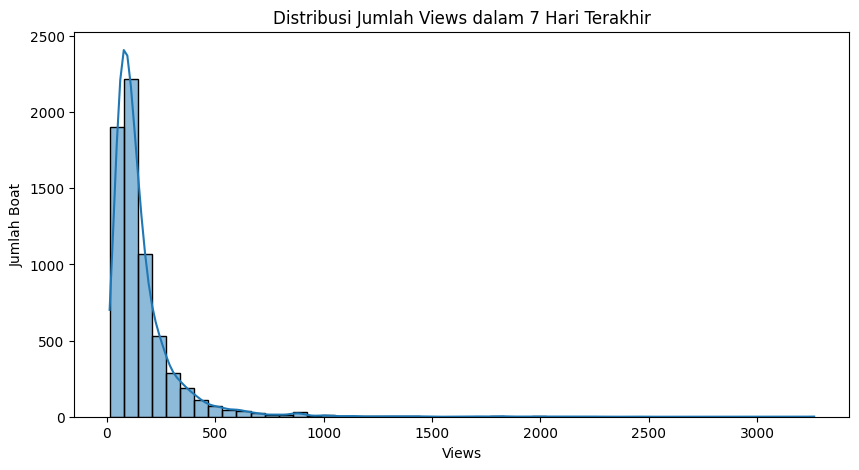

In [106]:
plt.figure(figsize=(10, 5)) # Membuat area canvas untuk visualisasi (plot) dengan ukuran 10x5 inch.

#Buat histogram dari kolom views,membagi data dlm 50 kel interval (agar distribusinya lebih halus)
#menambahkan kurva kepadatan (garis lengkung) untuk membantu melihat bentuk distribusi.
sns.histplot(df_cleaned['Number of views last 7 days'], bins=50, kde=True)
plt.title('Distribusi Jumlah Views dalam 7 Hari Terakhir')
plt.xlabel('Views')
plt.ylabel('Jumlah Boat')
plt.show()

**Insights:**
1. Batang histogram tertinggi berada di dekat angka 0 hingga sekitar 200-300 views. Ini menunjukkan bahwa sebagian besar kapal di dataset hanya mendapatkan sedikit views dalam 7 hari terakhir.
2. Datanya sama sekali tidak seimbang. Sebagian kecil perahu mendapatkan views yang sangat tinggi, sementara sebagian besar mendapatkan views yang rendah.
3. Ekor distribusi memanjang ke kanan, menunjukkan ada beberapa perahu yang memiliki views yang sangat tinggi (bahkan mencapai 3000 views atau lebih), meskipun jumlahnya sangat sedikit. Ini adalah outlier yang menarik.

**Implikasi untuk Analisis**:

Karena distribusinya sangat miring, menggunakan rata-rata saja mungkin tidak cukup. Median (nilai tengah) atau kuartil (persentil) akan menjadi metrik yang lebih baik untuk memahami views "tipikal" atau "rata-rata" dari mayoritas perahu.
Keberadaan outlier ini adalah alasan yang baik mengapa kita perlu mendefinisikan "kapal paling banyak dilihat" berdasarkan ambang batas (misalnya persentil ke-90) daripada hanya mengambil perahu dengan views tertinggi secara langsung. Ini membantu menangkap sekelompok perahu yang memang populer, bukan hanya beberapa perahu ekstrem.

**Kesimpulan:** Distribusi jumlah views sangat didominasi oleh perahu dengan views rendah. Ada sejumlah kecil perahu yang sangat populer (outlier dengan views tinggi).

In [107]:
# Ambil boat dengan jumlah view tertinggi - top 10%
# Hitung ambang batas views 90% (untuk top 10%)
threshold = df_cleaned['Number of views last 7 days'].quantile(0.90) #Ambil nilai views di persentil ke-90 (artinya hanya 10% boat yang punya views ≥ nilai ini)

#Ambil hanya boat yang jumlah views-nya lebih dari atau sama dengan threshold tadi
top_boats = df_cleaned[df_cleaned['Number of views last 7 days'] >= threshold]

# Menampilkan jumlah boat yang masuk dalam kategori top 5% views
print("Jumlah boat dalam top 10% views:", len(top_boats))
# Ambil 5 teratas dengan views tertinggi
df_top5_views = top_boats.sort_values(by='Number of views last 7 days', ascending=False).head(5)
df_top5_views

Jumlah boat dalam top 10% views: 661


,Price_USD,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Country_clean,Number of views last 7 days
9580,16390.0,Motor Yacht,Bayliner power boats,"Used Boat,Unleaded",1992,7.70,2.46,Plastic,Switzerland,3263
8723,38500.0,Hardtop,Princess power boats,"Used Boat,Diesel",1979,11.12,3.88,GRP,Switzerland,2432
6211,138490.0,"Bowrider,Motor Yacht,Sport Boat",Windy power boats,"Used Boat,Diesel",2002,12.35,3.48,GRP,Switzerland,2261
3700,1024920.0,Hardtop,Pershing power boats,"Used Boat,Diesel",2009,20.30,5.20,GRP,Germany,2154
308,21890.0,Sport Boat,Sea Ray power boats,"Used Boat,Unleaded",1993,6.14,2.34,Plastic,Switzerland,2026


**Interpretasi:**
1. Ada 661 kapal yang memiliki jumlah views di atas atau sama dengan persentil ke-90.
2. Mengingat total data bersih adalah 6574 baris, maka 661 kapal ini mewakili sekitar (661 / 6574) * 100% = 10.05% dari data bersih. Ini sesuai dengan ambang batas persentil ke-90 (top 10%).

**Kesimpulan:**
Berhasil mengidentifikasi 661 kapal yang termasuk dalam kategori top_boats (sekitar 10% dari data yang sudah dibersihkan) berdasarkan ambang batas persentil ke-90 dari jumlah views. Ini adalah kelompok yang akan dianalisis karakteristiknya.


---



**Langkah ke-2:** Analisis Per-kolom:

Supaya kita tahu pola seperti apa yang berkorelasi positif dengan banyaknya views. Semua kolom di dataset ini berpotensi berkorelasi atau berpengaruh terhadap views.

***Price_USD** - Sangat berpengaruh

Dari sisi pembeli: Orang pasti ngecek sesuai budget. Yang punya budget rendah, pasti cari yang murah, dan begitu juga sebaliknya.

In [108]:
# Statistik
top_boats['Price_USD'].describe()

,Price_USD
count,6.610000e+02
mean,2.209885e+05
std,1.265955e+06
min,4.180000e+03
25%,2.376000e+04
50%,4.860000e+04
75%,1.056000e+05
max,2.538000e+07


**Interpretasi:**
1. Jumlah (count): Ada 661 kapal dalam kategori top_boats ini, yang merupakan sekitar 10% dari total kapal bersih (6574).
2. Rata-Rata (mean): Harga rata-rata kapal di grup top_boats adalah sekitar $220,988.50.
3. Median (50%): Harga median kapal di grup top_boats adalah $48,600.00.
4. Terlihat perbedaan yang sangat besar antara mean dan median (mean ~$221K vs median ~$48K). Ini menunjukkan bahwa ada sejumlah kecil perahu di top_boats yang memiliki harga sangat tinggi (outlier) yang menarik nilai rata-rata ke atas.
5. Harga terendah di grup ini adalah $4,180 dan harga tertinggi adalah $25,380,000. Rentangnya sangat luas.

**Kesimpulan** awal untuk Price_USD (Kapal Paling Banyak Dilihat):
Meskipun ada beberapa perahu dengan harga sangat tinggi di antara yang paling banyak dilihat, mayoritas perahu yang populer memiliki harga yang relatif terjangkau. Median $48,600 mengindikasikan bahwa setengah dari perahu yang paling banyak dilihat harganya di bawah angka tersebut.

Statistik Deskriptif Price_USD (All Boats):
count    6.574000e+03
mean     3.000577e+05
std      8.024217e+05
min      3.670920e+03
25%      4.860000e+04
50%      1.026000e+05
75%      2.689200e+05
max      2.538000e+07
Name: Price_USD, dtype: float64

Statistik Deskriptif Price_USD (Top Viewed Boats):
count    6.610000e+02
mean     2.209885e+05
std      1.265955e+06
min      4.180000e+03
25%      2.376000e+04
50%      4.860000e+04
75%      1.056000e+05
max      2.538000e+07
Name: Price_USD, dtype: float64


<ipython-input-109-c818b2790769>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_cleaned['Price_USD'], palette=['skyblue'])


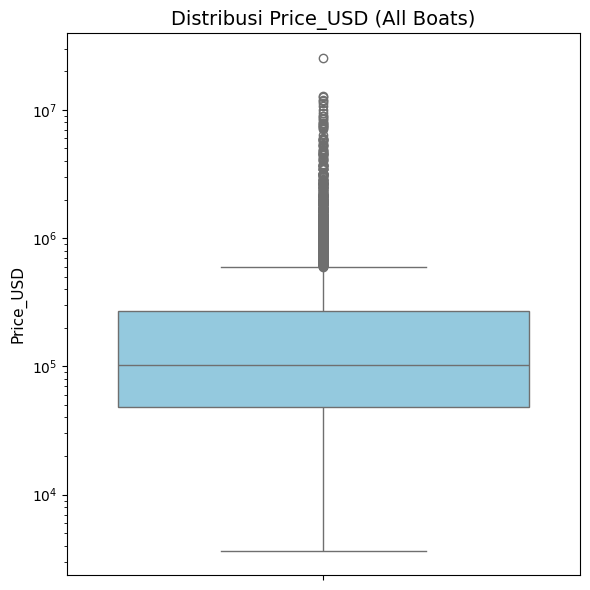

<ipython-input-109-c818b2790769>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=top_boats['Price_USD'], palette=['lightcoral'])


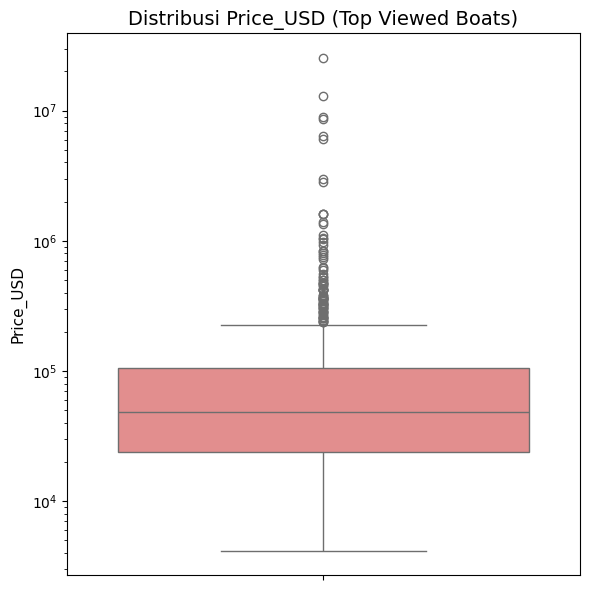

In [109]:
# Statistik Deskriptif untuk Semua Kapal
print("Statistik Deskriptif Price_USD (All Boats):")
print(df_cleaned['Price_USD'].describe())

# Statistik Deskriptif untuk Kapal Paling Banyak Dilihat
print("\nStatistik Deskriptif Price_USD (Top Viewed Boats):")
print(top_boats['Price_USD'].describe())

# --- Visualisasi Terpisah dengan Box Plot ---

# Box Plot untuk Semua Kapal
plt.figure(figsize=(6, 6))
# Menggunakan Seaborn (sns) untuk membuat box plot.
# y=df_cleaned['Price_USD']: Menentukan bahwa sumbu Y akan menampilkan nilai dari kolom 'Price_USD' dari 'df_cleaned'.
# palette=['skyblue']: Mengatur warna box plot menjadi 'skyblue'.
sns.boxplot(y=df_cleaned['Price_USD'], palette=['skyblue'])
plt.title('Distribusi Price_USD (All Boats)', fontsize=14)
plt.ylabel('Price_USD', fontsize=11)
if df_cleaned['Price_USD'].min() > 0:   # Mmeriksa apkah nilai minimum di kolom 'Price_USD' >0, skala logaritma tdk bisa diterapkan pd angka nol/negatif.
    plt.yscale('log') # Jika nilai minimum >0, sumbu Y akan diubah ke skala logaritmik.
    # Skala logaritmik sangat berguna ketika data memiliki rentang nilai yang sangat luas (misalnya, beberapa harga sangat kecil dan beberapa sangat besar),
plt.tight_layout() # Mengatur layout plot scr otomatis agar semua elemen (judul, label, dll.) pas di dalam area figure tanpa tumpang tindih.
plt.show()

# Box Plot untuk Kapal Paling Banyak Dilihat
plt.figure(figsize=(6, 6))
sns.boxplot(y=top_boats['Price_USD'], palette=['lightcoral'])
plt.title('Distribusi Price_USD (Top Viewed Boats)', fontsize=14)
plt.ylabel('Price_USD', fontsize=11)
if top_boats['Price_USD'].min() > 0:
    plt.yscale('log') # Skala log untuk harga
plt.tight_layout()
plt.show()

**Interpretasi Statistik:**
1. Rata-rata (Mean): All Boats: sekitar $300,057.70 dan Top Viewed Boats: sekitar $220,988.50

Observasi: Rata-rata harga Top Viewed Boats lebih rendah dari rata-rata harga All Boats. Ini menunjukkan kecenderungan bahwa kapal yang lebih murah cenderung populer, tetapi rata-rata masih sangat terpengaruh oleh outlier harga tinggi.
2. Median (50%): All Boats: $102,600.00 dan Top Viewed Boats: $48,600.00

Observasi: Median harga Top Viewed Boats secara signifikan lebih rendah dibandingkan dengan median All Boats. Ini adalah indikator yang jauh lebih kuat daripada rata-rata karena median tidak terpengaruh oleh outlier. Mayoritas kapal yang paling banyak dilihat memiliki harga di bawah $48,600.
3. Kuartil (25% dan 75%): Top Viewed Boats memiliki Q1 ($23,760) dan Q3 ($105,600) yang lebih rendah dibandingkan All Boats (Q1: $48,600, Q3: $268,920). Ini semakin menguatkan bahwa distribusi harga untuk kapal terpopuler lebih terkonsentrasi di segmen harga bawah.
4. Rentang Harga: Ke2 grup masih memiliki rentang harga yang sangat luas, dari ribuan hingga puluhan juta USD, menunjukkan keberadaan outlier yang sangat mahal di kedua sisi.

**Visualisasi Box Plot:**
1. Distribusi Price_USD (All Boats):
- Kotak utama (IQR) cukup lebar, menunjukkan variasi harga yang signifikan.
- Median (garis di dalam kotak) berada di sekitar $10^5 (yaitu $100,000), konsisten dengan statistik median.
- Banyak sekali titik outlier di atas kumis atas, mengindikasikan keberadaan kapal-kapal super mahal yang menarik rata-rata ke atas.
- Skala logaritmik membantu menunjukkan detail di harga yang lebih rendah.
2. Distribusi Price_USD (Top Viewed Boats):
- Kotak utama (IQR) lebih sempit dan posisinya lebih rendah dibandingkan box plot "All Boats".
- Median (garis di dalam kotak) berada di bawah $10^5 (sekitar $50,000), konsisten dengan statistik median $48,600.
- Meskipun mediannya lebih rendah, masih ada beberapa outlier dengan harga sangat tinggi, sama seperti pada "All Boats".

**Kesimpulan** untuk Price_USD:

Analisis ini dengan jelas menunjukkan bahwa harga adalah faktor yang sangat berkorelasi dengan jumlah views tinggi. Meskipun ada beberapa perahu yang sangat mahal yang tetap populer (ditunjukkan oleh outlier di kedua box plot), mayoritas perahu yang paling banyak dilihat memiliki harga yang jauh lebih terjangkau dibandingkan dengan pasar perahu secara keseluruhan. Median harga perahu terpopuler hampir setengah dari median harga perahu pada umumnya.

---



***Boat Type** - Penting banget

Ini ibarat model/type pada suatu merk HP (contohnya Vivo). Vivo type Y, V, atau T tentunya punya model yang berbeda dan spesifikasinya sendiri.

Top 5 Kategori (All Boats):
   Category  Percentage
Motor Yacht   27.593550
 Sport Boat   14.329176
  Flybridge   13.492546
 Pilothouse    6.738667
 Cabin Boat    6.251901

Top 5 Kategori (Top Viewed Boats):
   Category  Percentage
 Sport Boat   20.423601
Motor Yacht   17.700454
 Cabin Boat   12.859304
  Flybridge    4.538578
 Pilothouse    3.933434


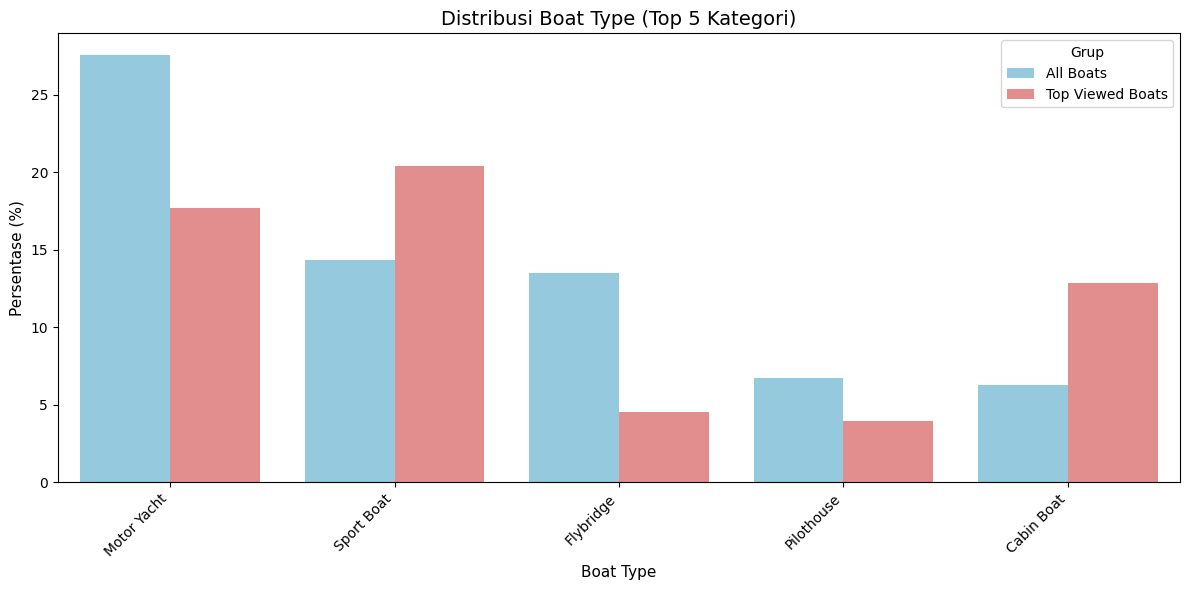

In [110]:
# Variabel ini akan digunakan sebagai nama kolom yang ingin kita analisis (misalnya, 'Boat Type', 'Manufacturer', dll.).
col = 'Boat Type'

if col in df_cleaned.columns and not df_cleaned[col].dropna().empty:
    # Hitung frekuensi untuk semua kapal dan ubah ke DataFrame
    all_boats_counts_df = df_cleaned[col].value_counts(normalize=True).mul(100).nlargest(5).reset_index()
    all_boats_counts_df.columns = ['Category', 'Percentage'] # Ubah nama kolom untuk konsistensi
    print(f"Top 5 Kategori (All Boats):\n{all_boats_counts_df.to_string(index=False)}") #Mncetak isi DF all_boats_counts_df & mmastikn indeksnya tdk ikut trcetak.


    # Hitung frekuensi untuk kapal paling banyak dilihat dan ubah ke DataFrame
    top_boats_counts_df = top_boats[col].value_counts(normalize=True).mul(100).nlargest(5).reset_index()
    top_boats_counts_df.columns = ['Category', 'Percentage'] # Ubah nama kolom untuk konsistensi
    print(f"\nTop 5 Kategori (Top Viewed Boats):\n{top_boats_counts_df.to_string(index=False)}")

    # Tambahkan kolom 'Group'
    all_boats_counts_df['Group'] = 'All Boats'
    top_boats_counts_df['Group'] = 'Top Viewed Boats'

    # Gabungkan kedua DataFrame
    df_plot = pd.concat([all_boats_counts_df, top_boats_counts_df])

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Percentage', hue='Group', data=df_plot, palette=['skyblue', 'lightcoral'])
    plt.title(f'Distribusi {col.replace("_", " ").title()} (Top 5 Kategori)', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=11)
    plt.ylabel('Persentase (%)', fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Grup')
    plt.tight_layout()
    plt.show()
else:
    print(f"Kolom '{col}' tidak ditemukan, atau kosong/NaN di DataFrame bersih.")

- col in df_cleaned.columns: Mmeriksa apkah 'Boat Type' benar2 ada di dlm df_cleaned.
- df_cleaned[col].dropna(): Mngambil kolom tsb & menghapus semua nilai kosong (NaN).
- empty: Mmeriksa apkh hslnya (setelah NaN dihapus) adalah Series yang kosong.
- Tujuan: Mencegah error jika kolom tdk ada/kolom tsb seluruhnya kosong/NaN.
1. df_cleaned[col]: Memilih kolom yang sedang dianalisis (misalnya 'Boat Type') dari DataFrame 'df_cleaned'.
2. value_counts(normalize=True): Menghitung brp kali setiap nilai unik muncul di kolom tsb (frekuensi). `normalize=True` membuat hasilnya menjadi proporsi (0.0 - 1.0) bukan jumlah mentah.
3. mul(100): Mengalikan proporsi dgn 100 untuk mengubahnya menjadi persentase.
4. nlargest(5): Memilih 5 kategori teratas (dengan persentase tertinggi).
5. reset_index(): Mngubah Series hsl `value_counts` (yg memiliki kategori sbg indeks) mjd DataFrame biasa dgn kolom numerik utk indeks & kolom utk kategori serta persentasenya. Hasilnya disimpan dalam DataFrame 'all_boats_counts_df'.
- hue='Group': akan mmbagi bar brdsrkan nilai unik di kolom 'Group'. Ini akan mnghslkn bar yg brbeda warna utk stiap grup dlm kategori yg sama, mmungkinkn prbndingan lgsg.
- col.replace("_", " "): Mengganti underscore (garis bawah) di nama kolom (misalnya 'Boat_Type' menjadi 'Boat Type').
- .title(): Mengubah setiap kata menjadi huruf kapital di awal (misalnya 'boat type' menjadi 'Boat Type').
- rotation=45: Memutar label sumbu X sebesar 45 derajat. Ini berguna jika nama kategori panjang agar tidak tumpang tindih.
- ha='right': Mengatur perataan horizontal label ke kanan, agar label yang diputar tetap rapi di bawah *tick*.

**Interpretasi** teks dan grafik:

Dari perbandingan Boat Type antara "All Boats" dan "Top Viewed Boats", kita dapat mengidentifikasi karakteristik yang berkorelasi positif dengan jumlah views yang tinggi:
1. Sport Boat: Persentase Sport Boat di "Top Viewed Boats" (sekitar 20.4%) lebih tinggi dibandingkan dengan persentasenya di "All Boats" (sekitar 14.3%). **Wawasan:** Ini menunjukkan bahwa Sport Boat adalah jenis perahu yang lebih populer secara proporsional di kalangan kapal yang banyak dilihat, dibandingkan dengan keberadaannya di pasar secara keseluruhan.
2. Cabin Boat: Persentase Cabin Boat di "Top Viewed Boats" (sekitar 12.9%) hampir dua kali lipat dari persentasenya di "All Boats" (sekitar 6.3%). **Wawasan:** Ini adalah peningkatan proporsi yang sangat signifikan, menunjukkan bahwa Cabin Boat sangat populer dan berkorelasi kuat dengan views tinggi.
3. Motor Yacht: Motor Yacht adalah jenis perahu paling umum di "All Boats" (sekitar 27.6%), tetapi persentasenya menurun secara signifikan di "Top Viewed Boats" (sekitar 17.7%). **Wawasan:** Meskipun banyak Motor Yacht yang tersedia, mereka cenderung kurang menarik views secara proporsional dibandingkan jenis perahu lain yang lebih mendominasi di grup "Top Viewed".
4. Flybridge dan Pilothouse: Kedua jenis ini menunjukkan penurunan persentase yang jelas di "Top Viewed Boats" dibandingkan "All Boats". **Wawasan:** Mereka kurang populer secara proporsional di kalangan kapal yang paling banyak dilihat.

**Kesimpulan Utama** untuk Boat Type: Jenis perahu yang paling menonjol dan berkorelasi positif dengan jumlah views yang tinggi adalah Sport Boat dan Cabin Boat. Sebaliknya, Motor Yacht, Flybridge, dan Pilothouse cenderung kurang menarik perhatian secara proporsional.

---



***Manufacturer** - Penting

Contohnya kalo produk motor dari suatu manufacturer viral karna belum 5thn sudah rusak, orang pasti akan menanyakan manufacturernya apa & menyarankan produk manufacturer lain.

Top 5 Kategori (All Boats):
             Category  Percentage
 Bénéteau power boats    8.031640
 Jeanneau power boats    5.841193
Sunseeker power boats    5.050198
  Sea Ray power boats    2.814116
 Princess power boats    2.783693

Top 5 Kategori (Top Viewed Boats):
             Category  Percentage
  Sea Ray power boats    4.538578
 Bayliner power boats    3.630862
    Windy power boats    3.177005
  Cranchi power boats    3.025719
Sunseeker power boats    2.874433


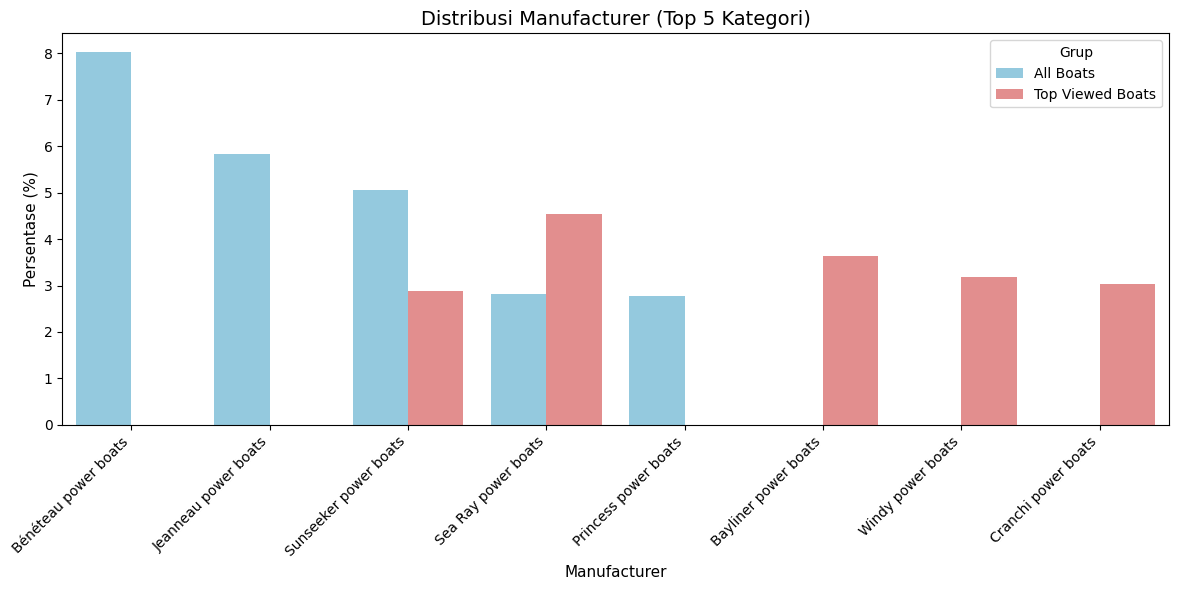

In [111]:
col = 'Manufacturer'

if col in df_cleaned.columns and not df_cleaned[col].dropna().empty:
    # Hitung frekuensi untuk semua kapal dan ubah ke DataFrame
    all_boats_counts_df = df_cleaned[col].value_counts(normalize=True).mul(100).nlargest(5).reset_index()
    all_boats_counts_df.columns = ['Category', 'Percentage'] # Ubah nama kolom untuk konsistensi
    print(f"Top 5 Kategori (All Boats):\n{all_boats_counts_df.to_string(index=False)}")

    # Hitung frekuensi untuk kapal paling banyak dilihat dan ubah ke DataFrame
    top_boats_counts_df = top_boats[col].value_counts(normalize=True).mul(100).nlargest(5).reset_index()
    top_boats_counts_df.columns = ['Category', 'Percentage'] # Ubah nama kolom untuk konsistensi
    print(f"\nTop 5 Kategori (Top Viewed Boats):\n{top_boats_counts_df.to_string(index=False)}")

    # Tambahkan kolom 'Group'
    all_boats_counts_df['Group'] = 'All Boats'
    top_boats_counts_df['Group'] = 'Top Viewed Boats'

    # Gabungkan kedua DataFrame
    df_plot = pd.concat([all_boats_counts_df, top_boats_counts_df])

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Percentage', hue='Group', data=df_plot, palette=['skyblue', 'lightcoral'])
    plt.title(f'Distribusi {col.replace("_", " ").title()} (Top 5 Kategori)', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=11)
    plt.ylabel('Persentase (%)', fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Grup')
    plt.tight_layout()
    plt.show()
else:
    print(f"Kolom '{col}' tidak ditemukan, atau kosong/NaN di DataFrame bersih.")

**Interpretasi** teks dan grafik:
Dari perbandingan Manufacturer antara "All Boats" dan "Top Viewed Boats", kita dapat melihat perubahan dalam daftar top 5:
1. Bénéteau power boats, Jeanneau power boats, dan Princess power boats ada di Top 5 "All Boats", tetapi tidak muncul di Top 5 "Top Viewed Boats". **Wawasan:** Ini mengindikasikan bahwa meskipun produsen-produsen ini memiliki banyak kapal di pasar, kapal-kapal mereka tidak secara proporsional mendapatkan views tinggi.
2. Sunseeker power boats muncul di kedua daftar Top 5. **Wawasan:** Persentasenya di Top Viewed Boats menurun, meskipun masih ada di Top 5. Ini menunjukkan bahwa Sunseeker mungkin tidak sepopuler secara proporsional seperti yang diharapkan dari keberadaannya di pasar.
3. Sea Ray power boats: Persentase Sea Ray power boats meningkat signifikan di antara kapal yang paling banyak dilihat. Ini menunjukkan bahwa Sea Ray power boats adalah produsen yang sangat populer dan berkorelasi positif dengan views tinggi.
4. Bayliner power boats, Windy power boats, dan Cranchi power boats tidak masuk Top 5 di "All Boats" tetapi muncul di Top 5 "Top Viewed Boats" dengan persentase yang cukup menonjol. **Wawasan:** Ini adalah indikator kuat bahwa produsen-produsen ini (terutama Bayliner) menghasilkan kapal yang sangat menarik perhatian dan berkorelasi positif dengan views tinggi, meskipun mereka mungkin tidak memiliki jumlah kapal sebanyak produsen lain di seluruh pasar.

**Kesimpulan Utama** untuk Manufacturer: Beberapa produsen menunjukkan korelasi positif yang kuat dengan jumlah views yang tinggi, meskipun mereka mungkin tidak mendominasi pangsa pasar secara keseluruhan. Produsen yang paling menonjol di antara kapal populer adalah Sea Ray power boats, Bayliner power boats, Windy power boats, dan Cranchi power boats. Sebaliknya, Bénéteau, Jeanneau, dan Princess tampaknya kurang menarik views secara proporsional.

---

***Type** - Relevan banget

Pembeli pasti ingin tahu apakah boat ini baru/bekas, pakai bahan bakar apa.

Top 5 Kategori (All Boats):
                    Category  Percentage
            Used Boat,Diesel   44.904168
          Used Boat,Unleaded   20.109522
New Boat From Stock,Unleaded   11.134773
                   Used Boat   10.952236
         New Boat From Stock    4.791603

Top 5 Kategori (Top Viewed Boats):
                    Category  Percentage
          Used Boat,Unleaded   52.647504
            Used Boat,Diesel   27.836611
                   Used Boat    5.295008
New Boat From Stock,Unleaded    5.143722
         New Boat From Stock    2.118003


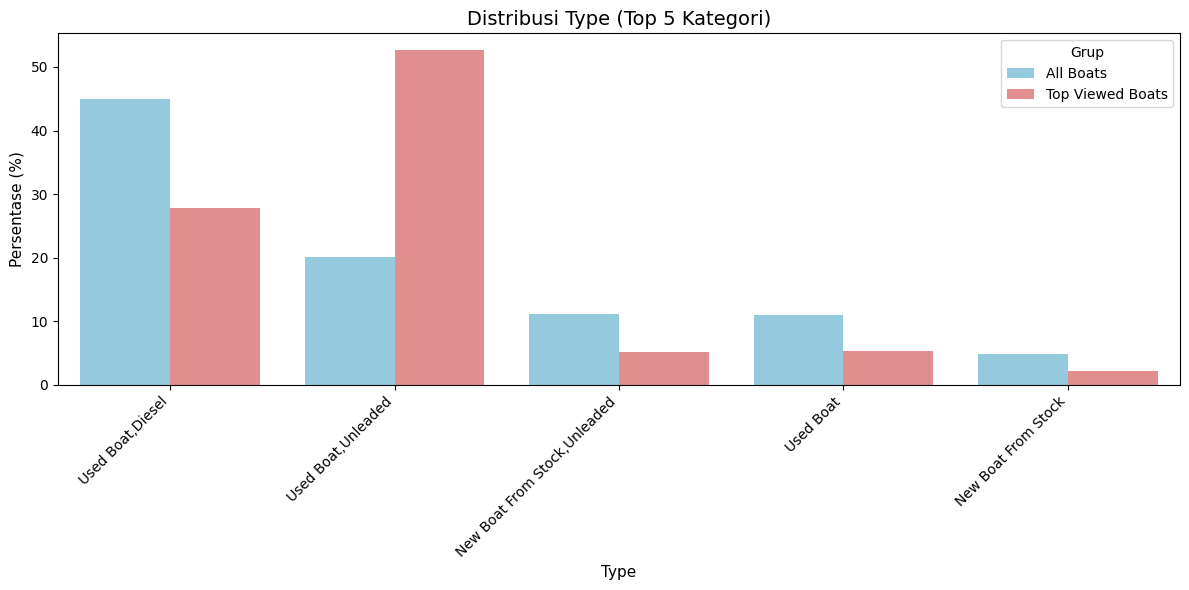

In [112]:
col = 'Type'

if col in df_cleaned.columns and not df_cleaned[col].dropna().empty:
    # Hitung frekuensi untuk semua kapal dan ubah ke DataFrame
    all_boats_counts_df = df_cleaned[col].value_counts(normalize=True).mul(100).nlargest(5).reset_index()
    all_boats_counts_df.columns = ['Category', 'Percentage'] # Ubah nama kolom untuk konsistensi
    print(f"Top 5 Kategori (All Boats):\n{all_boats_counts_df.to_string(index=False)}")

    # Hitung frekuensi untuk kapal paling banyak dilihat dan ubah ke DataFrame
    top_boats_counts_df = top_boats[col].value_counts(normalize=True).mul(100).nlargest(5).reset_index()
    top_boats_counts_df.columns = ['Category', 'Percentage'] # Ubah nama kolom untuk konsistensi
    print(f"\nTop 5 Kategori (Top Viewed Boats):\n{top_boats_counts_df.to_string(index=False)}")

    # Tambahkan kolom 'Group'
    all_boats_counts_df['Group'] = 'All Boats'
    top_boats_counts_df['Group'] = 'Top Viewed Boats'

    # Gabungkan kedua DataFrame
    df_plot = pd.concat([all_boats_counts_df, top_boats_counts_df])

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Percentage', hue='Group', data=df_plot, palette=['skyblue', 'lightcoral'])
    plt.title(f'Distribusi {col.replace("_", " ").title()} (Top 5 Kategori)', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=11)
    plt.ylabel('Persentase (%)', fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Grup')
    plt.tight_layout()
    plt.show()
else:
    print(f"Kolom '{col}' tidak ditemukan, atau kosong/NaN di DataFrame bersih.")

**Interpretasi** gabungan (Teks dan Grafik):
Dari perbandingan Type antara "All Boats" dan "Top Viewed Boats", kita dapat mengidentifikasi karakteristik yang berkorelasi positif dengan jumlah views yang tinggi:
1. Used Boat, Unleaded: Persentase di "All Boats" adalah sekitar 20.1%, tetapi meningkat drastis menjadi sekitar 52.6% di "Top Viewed Boats". **Wawasan:** Ini adalah peningkatakan proporsi yang sangat signifikan dan menunjukkan bahwa (Used Boat, Unleaded) adalah jenis yang sangat populer dan berkorelasi kuat dengan views tinggi. Ini adalah karakteristik paling menonjol sejauh ini.
2. Used Boat, Diesel: Jenis ini adalah yang paling dominan di "All Boats" dengan 44.9%, tetapi persentasenya menurun signifikan menjadi 27.8% di "Top Viewed Boats". **Wawasan:** Meskipun masih banyak terlihat, (Used Boat, Diesel) kurang populer secara proporsional dibandingkan (Used Boat, Unleaded) di kalangan kapal yang banyak dilihat.
3. Used Boat: Persentasenya sedikit menurun dari 10.95% di "All Boats" menjadi 5.30% di "Top Viewed Boats". **Wawasan:** Used Boat (tanpa spesifikasi bahan bakar) juga kurang populer secara proporsional di grup Top Viewed.
4. (New Boat From Stock, Unleaded) dan New Boat From Stock: Ke2 kategori ini menunjukkan penurunan persentase di "Top Viewed Boats" dibandingkan "All Boats". **Wawasan:** Ini menunjukkan bahwa kapal bekas (used), terutama yang menggunakan bensin (unleaded), cenderung jauh lebih populer daripada kapal baru dalam hal menarik views. Ini sejalan dengan temuan kita di Price_USD bahwa harga yang lebih terjangkau cenderung populer.

**Kesimpulan Utama** untuk Type: Karakteristik Type yang paling kuat berkorelasi positif dengan jumlah views yang tinggi adalah (Used Boat, Unleaded). Ini mengindikasikan preferensi yang jelas dari audiens terhadap kapal bekas yang menggunakan bensin. Kapal baru, baik bensin maupun diesel, serta kapal diesel bekas, cenderung kurang populer secara proporsional.

---

***Year Built** - Sangat menarik untuk dieksplorasi

Karena ada 2 tipe orang: yang suka klasik (kolektor), dan yang lebih cari modern (fitur, keselamatan, performa).

Statistik Deskriptif Year Built (All Boats):
count    6574.000000
mean     2006.827502
std        12.623541
min      1901.000000
25%      2000.250000
50%      2008.000000
75%      2018.000000
max      2021.000000
Name: Year Built, dtype: float64

Statistik Deskriptif Year Built (Top Viewed Boats):
count     661.000000
mean     1999.888048
std        15.421341
min      1901.000000
25%      1990.000000
50%      2001.000000
75%      2012.000000
max      2021.000000
Name: Year Built, dtype: float64


<ipython-input-113-6dace3e7c547>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_cleaned['Year Built'], palette=['skyblue'])


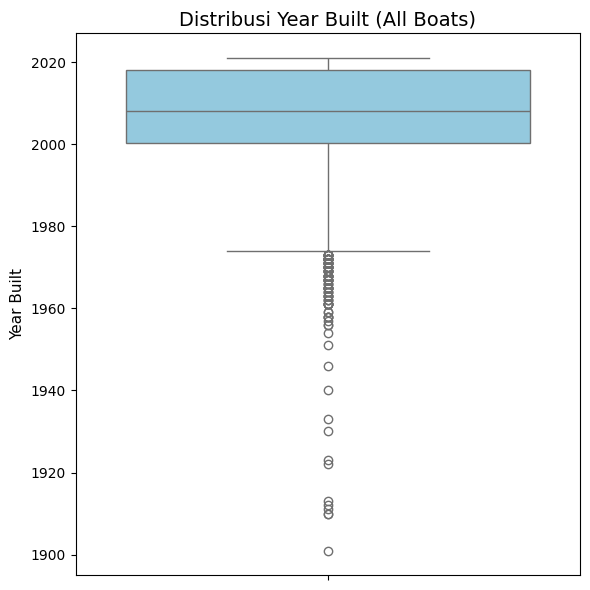

<ipython-input-113-6dace3e7c547>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=top_boats['Year Built'], palette=['lightcoral'])


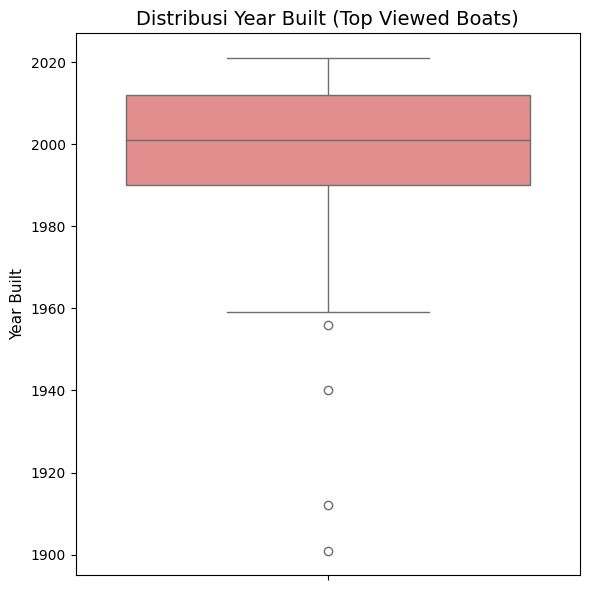

In [113]:
# Statistik Deskriptif untuk Semua Kapal
print("Statistik Deskriptif Year Built (All Boats):")
print(df_cleaned['Year Built'].describe())

# Statistik Deskriptif untuk Kapal Paling Banyak Dilihat
print("\nStatistik Deskriptif Year Built (Top Viewed Boats):")
print(top_boats['Year Built'].describe())

# --- Visualisasi Terpisah dengan Box Plot ---

# Box Plot untuk Semua Kapal
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_cleaned['Year Built'], palette=['skyblue'])
plt.title('Distribusi Year Built (All Boats)', fontsize=14)
plt.ylabel('Year Built', fontsize=11)
plt.tight_layout()
plt.show()

# Box Plot untuk Kapal Paling Banyak Dilihat
plt.figure(figsize=(6, 6))
sns.boxplot(y=top_boats['Year Built'], palette=['lightcoral'])
plt.title('Distribusi Year Built (Top Viewed Boats)', fontsize=14)
plt.ylabel('Year Built', fontsize=11)
plt.tight_layout()
plt.show()

**Visualisasi Box Plot:**
1. Distribusi Year Built (All Boats):
- Kotak utama (IQR) menunjukkan sebagian besar kapal dibangun antara sekitar tahun 2000 dan 2018.
- Median (garis di dalam kotak) berada di sekitar tahun 2008.
- Ada banyak outlier di bagian bawah, menunjukkan banyak kapal yang dibangun jauh sebelum tahun 2000.
2. Distribusi Year Built (Top Viewed Boats):
- Kotak utama (IQR) menunjukkan sebagian besar kapal populer dibangun antara sekitar tahun 1990 dan 2012.
- Median (garis di dalam kotak) berada di sekitar tahun 2001.
- Meskipun ada beberapa outlier yang sangat tua, jumlahnya terlihat lebih sedikit dibandingkan dengan "All Boats".

**Interpretasi dan Korelasi:**
Dari perbandingan statistik deskriptif dan box plot untuk Year Built, kita dapat menarik kesimpulan tentang korelasi dengan jumlah views tertinggi:
1. Pergeseran Median yang Signifikan: Median tahun pembuatan untuk "All Boats" adalah 2008, yang berarti setengah dari semua kapal dibangun setelah tahun 2008.
Namun, median tahun pembuatan untuk "Top Viewed Boats" adalah 2001, yang berarti setengah dari kapal populer dibangun setelah tahun 2001. **Wawasan:** Pergeseran median ini menunjukkan bahwa kapal yang lebih tua (tahun pembuatan lebih rendah) cenderung mendapatkan lebih banyak views. Ada selisih sekitar 7 tahun antara median kedua grup, di mana kapal populer cenderung lebih tua.
2. Rentang Kuartil (IQR): Rentang tahun 25%-75% untuk "All Boats" adalah 2000-2018. Rentang tahun 25%-75% untuk "Top Viewed Boats" adalah 1990-2012. **Wawasan:** Kotak (IQR) pada box plot "Top Viewed Boats" bergeser ke kiri (tahun lebih tua) dibandingkan dengan "All Boats". Ini mengindikasikan bahwa sebagian besar kapal yang paling banyak dilihat adalah kapal-kapal yang berusia lebih tua.

**Kesimpulan** untuk Year Built: Analisis ini dengan jelas menunjukkan bahwa usia kapal berkorelasi positif dengan jumlah views yang tinggi, yang berarti kapal yang lebih tua cenderung menarik lebih banyak perhatian. Korelasi ini selaras dengan temuan kita pada Price_USD (harga lebih rendah populer) dan Type (Used Boat, Unleaded populer), karena kapal yang lebih tua seringkali memiliki harga yang lebih terjangkau dan kemungkinan besar adalah kapal bekas.

---

***Length & Width** - Faktor ukuran jelas penting

Mirip beli mobil: ukuran penting untuk pertimbangan kenyamanan, kapasitas, dll.

Statistik Deskriptif Length (All Boats):
count    6574.000000
mean       11.239214
std         5.183734
min         2.320000
25%         7.480000
50%        10.035000
75%        13.720000
max        56.000000
Name: Length, dtype: float64

Statistik Deskriptif Length (Top Viewed Boats):
count    661.000000
mean       9.149244
std        4.545220
min        2.500000
25%        6.550000
50%        8.180000
75%       10.150000
max       56.000000
Name: Length, dtype: float64


<ipython-input-114-5b5ecb90d70a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_cleaned['Length'], palette=['skyblue'])


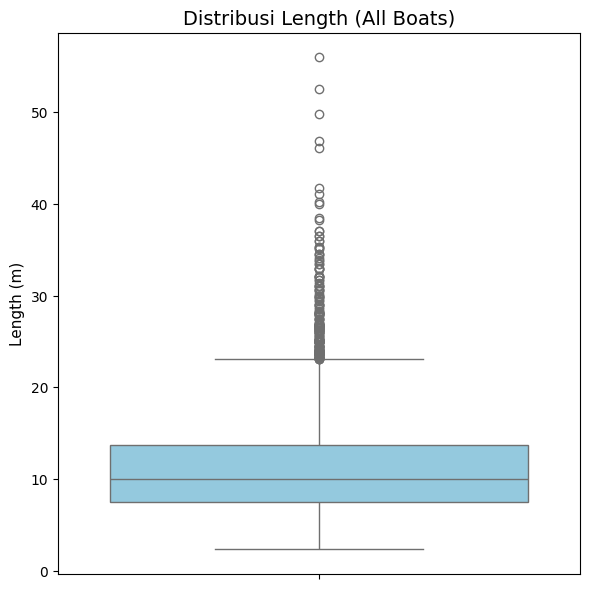

<ipython-input-114-5b5ecb90d70a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=top_boats['Length'], palette=['lightcoral'])


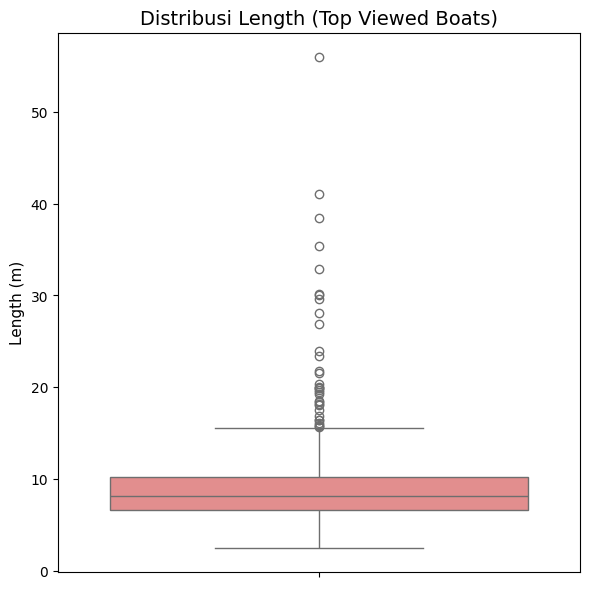

In [114]:
# Length
# Statistik Deskriptif untuk Semua Kapal
print("Statistik Deskriptif Length (All Boats):")
print(df_cleaned['Length'].describe())

# Statistik Deskriptif untuk Kapal Paling Banyak Dilihat
print("\nStatistik Deskriptif Length (Top Viewed Boats):")
print(top_boats['Length'].describe())

# --- Visualisasi Terpisah dengan Box Plot ---

# Box Plot untuk Semua Kapal
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_cleaned['Length'], palette=['skyblue'])
plt.title('Distribusi Length (All Boats)', fontsize=14)
plt.ylabel('Length (m)', fontsize=11)
plt.tight_layout()
plt.show()

# Box Plot untuk Kapal Paling Banyak Dilihat
plt.figure(figsize=(6, 6))
sns.boxplot(y=top_boats['Length'], palette=['lightcoral'])
plt.title('Distribusi Length (Top Viewed Boats)', fontsize=14)
plt.ylabel('Length (m)', fontsize=11)
plt.tight_layout()
plt.show()

**Visualisasi Box Plot:**
1. Distribusi Length (All Boats):
- Kotak utama (IQR) menunjukkan sebagian besar kapal memiliki panjang antara sekitar 7.5 meter dan 13.7 meter.
- Median (garis di dalam kotak) berada di sekitar 10.04 meter.
- Ada banyak outlier di bagian atas, menunjukkan keberadaan kapal-kapal yang sangat panjang.
2. Distribusi Length (Top Viewed Boats):
- Kotak utama (IQR) menunjukkan sebagian besar kapal populer memiliki panjang antara sekitar 6.5 meter dan 10.15 meter.
- Median (garis di dalam kotak) berada di sekitar 8.18 meter.
- Pola outlier yang sangat panjang masih ada, tetapi kotak utama lebih terkompresi dan bergeser ke bawah.

**Interpretasi dan Korelasi:**
Dari perbandingan statistik deskriptif dan box plot untuk Length, kita dapat menarik kesimpulan tentang korelasi dengan jumlah views tertinggi:
1. Pergeseran Median ke Bawah (Lebih Pendek):
- Median panjang untuk "All Boats" adalah sekitar 10.04 meter.
- Median panjang untuk "Top Viewed Boats" adalah sekitar 8.18 meter.
- **Wawasan:** Ada perbedaan yang jelas bahwa kapal yang lebih pendek cenderung mendapatkan lebih banyak views. Median kapal populer hampir 2 meter lebih pendek dari median semua kapal.
2. Rentang Kuartil (IQR) yang Lebih Kecil:
- Rentang 25%-75% untuk "All Boats" adalah 7.48m hingga 13.72m.
- Rentang 25%-75% untuk "Top Viewed Boats" adalah 6.55m hingga 10.15m.
- **Wawasan:** Kotak (IQR) pada box plot "Top Viewed Boats" secara keseluruhan bergeser ke bawah (panjang lebih pendek) dan memiliki rentang yang lebih sempit dibandingkan dengan "All Boats". Ini menunjukkan bahwa distribusi panjang kapal yang populer lebih terkonsentrasi pada ukuran yang lebih kecil.

**Kesimpulan** untuk Length: Analisis ini menunjukkan bahwa panjang kapal berkorelasi terbalik dengan jumlah views yang tinggi, yang berarti kapal yang lebih pendek cenderung menarik lebih banyak perhatian. Korelasi ini konsisten dengan temuan kita sebelumnya tentang Price_USD (harga lebih rendah), Year Built (usia lebih tua), dan Type (Used Boat, Unleaded), karena kapal yang lebih pendek dan lebih tua cenderung lebih terjangkau.

---

Statistik Deskriptif Width (All Boats):
count    6574.000000
mean        3.478756
std         1.122512
min         0.860000
25%         2.550000
50%         3.300000
75%         4.200000
max        16.000000
Name: Width, dtype: float64

Statistik Deskriptif Width (Top Viewed Boats):
count    661.000000
mean       2.971165
std        1.019980
min        1.330000
25%        2.430000
50%        2.590000
75%        3.300000
max       10.400000
Name: Width, dtype: float64


<ipython-input-115-dab1e17e6144>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_cleaned['Width'], palette=['skyblue'])


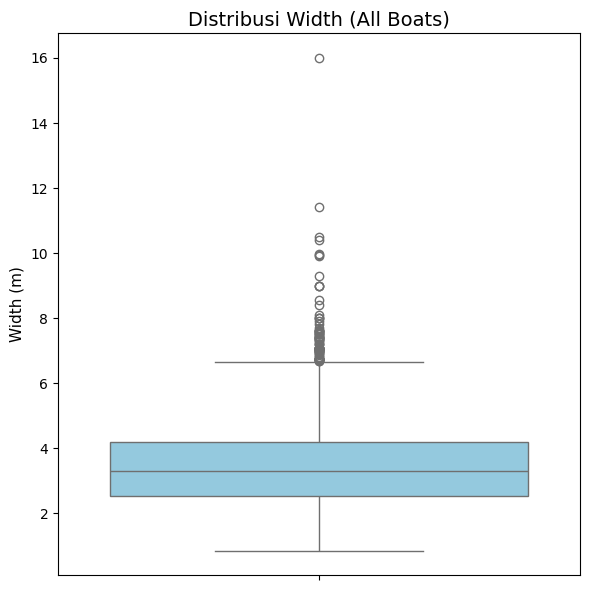

<ipython-input-115-dab1e17e6144>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=top_boats['Width'], palette=['lightcoral'])


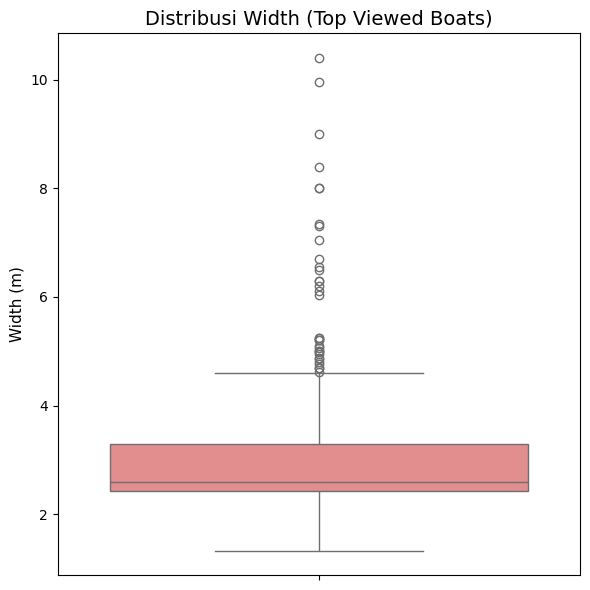

In [115]:
# Width
# Statistik Deskriptif untuk Semua Kapal
print("Statistik Deskriptif Width (All Boats):")
print(df_cleaned['Width'].describe())

# Statistik Deskriptif untuk Kapal Paling Banyak Dilihat
print("\nStatistik Deskriptif Width (Top Viewed Boats):")
print(top_boats['Width'].describe())

# --- Visualisasi Terpisah dengan Box Plot ---

# Box Plot untuk Semua Kapal
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_cleaned['Width'], palette=['skyblue'])
plt.title('Distribusi Width (All Boats)', fontsize=14)
plt.ylabel('Width (m)', fontsize=11)
plt.tight_layout()
plt.show()

# Box Plot untuk Kapal Paling Banyak Dilihat
plt.figure(figsize=(6, 6))
sns.boxplot(y=top_boats['Width'], palette=['lightcoral'])
plt.title('Distribusi Width (Top Viewed Boats)', fontsize=14)
plt.ylabel('Width (m)', fontsize=11)
plt.tight_layout()
plt.show()

**Visualisasi Box Plot:**
1. Distribusi Width (All Boats):
- Kotak utama (IQR) menunjukkan sebagian besar kapal memiliki lebar antara sekitar 2.55 meter dan 4.20 meter.
- Median (garis di dalam kotak) berada di sekitar 3.30 meter.
- Ada cukup banyak outlier di bagian atas, menunjukkan keberadaan kapal-kapal yang sangat lebar.
2. Distribusi Width (Top Viewed Boats):
- Kotak utama (IQR) menunjukkan sebagian besar kapal populer memiliki lebar antara sekitar 2.43 meter dan 3.30 meter.
- Median (garis di dalam kotak) berada di sekitar 2.59 meter.
- Pola outlier yang sangat lebar masih ada, tetapi kotak utama lebih terkompresi dan bergeser ke bawah.

**Interpretasi dan Korelasi:** Dari perbandingan statistik deskriptif dan box plot untuk Width, kita dapat menarik kesimpulan tentang korelasi dengan jumlah views tertinggi:
1. Pergeseran Median yang Jelas (Lebih Sempit):
- Median lebar untuk "All Boats" adalah sekitar 3.30 meter.
- Median lebar untuk "Top Viewed Boats" adalah sekitar 2.59 meter.
- **Wawasan:** Pergeseran median ini menunjukkan bahwa kapal yang lebih sempit (lebar lebih kecil) cenderung mendapatkan lebih banyak views. Median kapal populer hampir 0.7 meter lebih sempit dari median semua kapal.
2. Rentang Kuartil (IQR) yang Lebih Kecil:
- Rentang 25%-75% untuk "All Boats" adalah 2.55m hingga 4.20m.
- Rentang 25%-75% untuk "Top Viewed Boats" adalah 2.43m hingga 3.30m.
- **Wawasan:** Kotak (IQR) pada box plot "Top Viewed Boats" secara keseluruhan bergeser ke bawah (lebar lebih sempit) dan memiliki rentang yang lebih sempit dibandingkan dengan "All Boats". Ini menunjukkan bahwa distribusi lebar kapal yang populer lebih terkonsentrasi pada ukuran yang lebih kecil.

**Kesimpulan** untuk Width: Analisis ini menunjukkan bahwa lebar kapal berkorelasi terbalik dengan jumlah views yang tinggi, yang berarti kapal yang lebih sempit cenderung menarik lebih banyak perhatian. Korelasi ini konsisten dengan temuan sebelumnya tentang Price_USD (harga lebih rendah), Year Built (usia lebih tua), Type (Used Boat, Unleaded), dan Length (panjang lebih pendek). Secara keseluruhan, tren menunjukkan preferensi audiens terhadap kapal yang berukuran lebih kecil, lebih tua, dan lebih terjangkau.

---

***Material** - Sedikit lebih teknikal, tapi tetap bisa penting

Untuk sebagian orang, material seperti Aluminium vs Wood mungkin ngaruh ke berat, ketahanan, biaya maintenance.

Top 5 Kategori (All Boats):
 Category  Percentage
      GRP   71.569821
      PVC   16.321874
    Steel    6.221479
     Wood    2.236082
Aluminium    1.962276

Top 5 Kategori (Top Viewed Boats):
 Category  Percentage
      GRP   78.063540
  Plastic    6.051437
     Wood    5.900151
    Steel    5.597579
Aluminium    1.815431


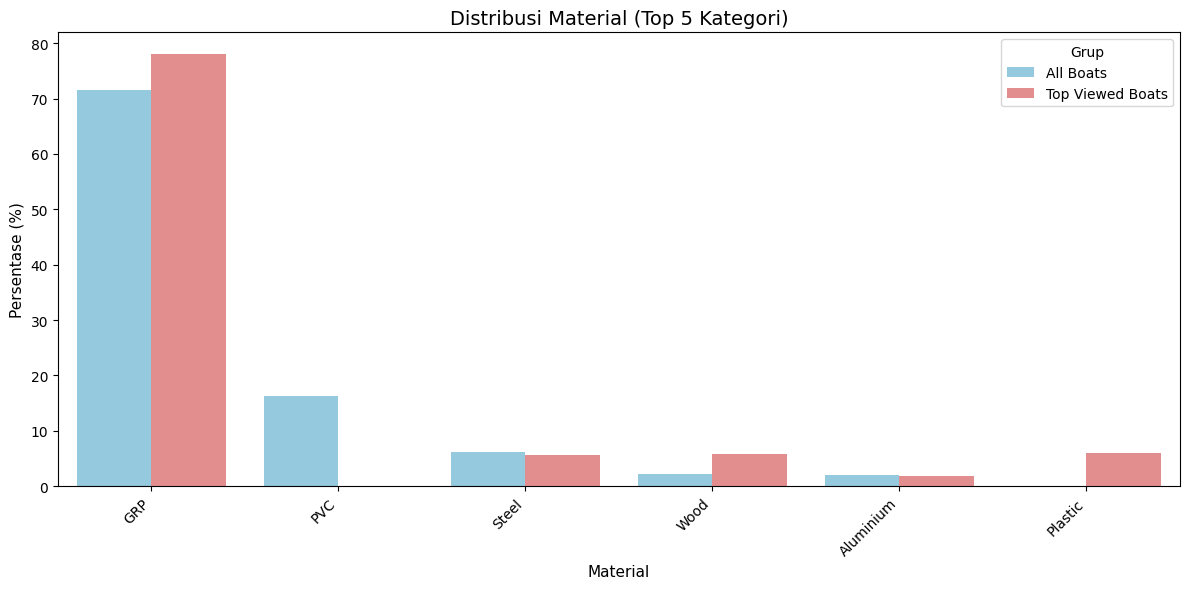

In [116]:
col = 'Material'

if col in df_cleaned.columns and not df_cleaned[col].dropna().empty:
    # Hitung frekuensi untuk semua kapal dan ubah ke DataFrame
    all_boats_counts_df = df_cleaned[col].value_counts(normalize=True).mul(100).nlargest(5).reset_index()
    all_boats_counts_df.columns = ['Category', 'Percentage'] # Ubah nama kolom untuk konsistensi
    print(f"Top 5 Kategori (All Boats):\n{all_boats_counts_df.to_string(index=False)}")

    # Hitung frekuensi untuk kapal paling banyak dilihat dan ubah ke DataFrame
    top_boats_counts_df = top_boats[col].value_counts(normalize=True).mul(100).nlargest(5).reset_index()
    top_boats_counts_df.columns = ['Category', 'Percentage'] # Ubah nama kolom untuk konsistensi
    print(f"\nTop 5 Kategori (Top Viewed Boats):\n{top_boats_counts_df.to_string(index=False)}")

    # Tambahkan kolom 'Group'
    all_boats_counts_df['Group'] = 'All Boats'
    top_boats_counts_df['Group'] = 'Top Viewed Boats'

    # Gabungkan kedua DataFrame
    df_plot = pd.concat([all_boats_counts_df, top_boats_counts_df])

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Percentage', hue='Group', data=df_plot, palette=['skyblue', 'lightcoral'])
    plt.title(f'Distribusi {col.replace("_", " ").title()} (Top 5 Kategori)', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=11)
    plt.ylabel('Persentase (%)', fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Grup')
    plt.tight_layout()
    plt.show()
else:
    print(f"Kolom '{col}' tidak ditemukan, atau kosong/NaN di DataFrame bersih.")

**Interpretasi** gabungan (Teks dan Grafik):

Dari perbandingan Material antara "All Boats" dan "Top Viewed Boats", kita dapat mengidentifikasi karakteristik yang berkorelasi positif dengan jumlah views yang tinggi:
1. GRP: Persentase di "All Boats" adalah sekitar 71.6%, yang sudah sangat dominan. Namun, persentasenya meningkat lebih lanjut menjadi sekitar 78.1% di "Top Viewed Boats". **Wawasan:** Ini menunjukkan bahwa GRP adalah material yang sangat dominan dan memiliki korelasi positif yang kuat dengan views tinggi. Kapal dengan material GRP cenderung lebih sering dicari atau menarik perhatian.
2. PVC: Material PVC menempati posisi kedua di "All Boats" dengan sekitar 16.3%, tetapi tidak masuk Top 5 di "Top Viewed Boats". **Wawasan:** Ini mengindikasikan bahwa meskipun ada banyak kapal PVC di pasar, mereka tidak secara proporsional populer di kalangan kapal yang banyak dilihat.
3. Wood: Persentase di "All Boats" relatif kecil (sekitar 2.2%), tetapi meningkat signifikan menjadi sekitar 5.9% di "Top Viewed Boats". **Wawasan:** Peningkatan proporsi ini menunjukkan bahwa kapal dengan material Wood cukup populer secara proporsional di antara kapal yang paling banyak dilihat, meskipun secara keseluruhan jumlahnya tidak sebanyak GRP.
4. Steel: Persentase Steel sedikit menurun dari sekitar 6.2% di "All Boats" menjadi sekitar 5.6% di "Top Viewed Boats". **Wawasan:** Meskipun masih di Top 5, Steel tidak menunjukkan peningkatan proporsional di grup populer.
5. Aluminium: Persentase Aluminium sedikit menurun dari sekitar 2.0% di "All Boats" menjadi sekitar 1.8% di "Top Viewed Boats". **Wawasan:** Material ini tidak menunjukkan peningkatan proporsional di grup populer.
6. Plastic: Plastic tidak masuk Top 5 di "All Boats" tetapi muncul di Top 5 "Top Viewed Boats" dengan sekitar 6.1%. **Wawasan:** Ini adalah indikator kuat bahwa kapal dengan material Plastic sangat menarik perhatian dan berkorelasi positif dengan views tinggi, meskipun mereka mungkin tidak memiliki jumlah kapal sebanyak material lain di seluruh pasar.

**Kesimpulan Utama** untuk Material: Material yang paling menonjol dan berkorelasi positif dengan jumlah views yang tinggi adalah GRP (karena dominasi yang meningkat) dan Plastic (muncul di Top Viewed walaupun tidak di All Boats), diikuti oleh Wood (peningkatan proporsi yang jelas). Sebaliknya, PVC cenderung kurang menarik views secara proporsional.

---

***Country_clean** - Lumayan penting tergantung konteks pasar

Orang mungkin lebih memilih produk lokal (mudah dikirim, bisa dicek langsung), atau dari negara tertentu yang terkenal dengan produksi boat bagus.

Top 5 Kategori (All Boats):
   Category  Percentage
    Germany   18.923030
      Italy   15.393976
     France   14.800730
Switzerland   13.827198
    Croatia   10.298144

Top 5 Kategori (Top Viewed Boats):
   Category  Percentage
Switzerland   56.278366
    Germany   18.456884
      Italy    8.623298
      Spain    2.874433
    Croatia    2.874433


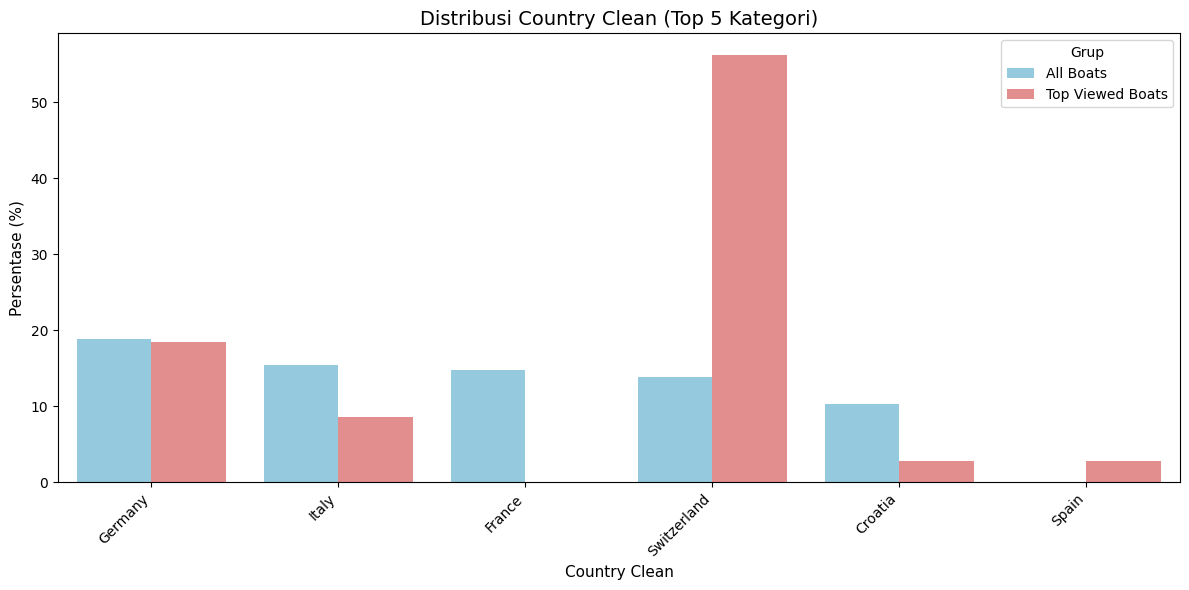

In [117]:
col = 'Country_clean'

if col in df_cleaned.columns and not df_cleaned[col].dropna().empty:
    # Hitung frekuensi untuk semua kapal dan ubah ke DataFrame
    all_boats_counts_df = df_cleaned[col].value_counts(normalize=True).mul(100).nlargest(5).reset_index()
    all_boats_counts_df.columns = ['Category', 'Percentage'] # Ubah nama kolom untuk konsistensi
    print(f"Top 5 Kategori (All Boats):\n{all_boats_counts_df.to_string(index=False)}")

    # Hitung frekuensi untuk kapal paling banyak dilihat dan ubah ke DataFrame
    top_boats_counts_df = top_boats[col].value_counts(normalize=True).mul(100).nlargest(5).reset_index()
    top_boats_counts_df.columns = ['Category', 'Percentage'] # Ubah nama kolom untuk konsistensi
    print(f"\nTop 5 Kategori (Top Viewed Boats):\n{top_boats_counts_df.to_string(index=False)}")

    # Tambahkan kolom 'Group'
    all_boats_counts_df['Group'] = 'All Boats'
    top_boats_counts_df['Group'] = 'Top Viewed Boats'

    # Gabungkan kedua DataFrame
    df_plot = pd.concat([all_boats_counts_df, top_boats_counts_df])

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Percentage', hue='Group', data=df_plot, palette=['skyblue', 'lightcoral'])
    plt.title(f'Distribusi {col.replace("_", " ").title()} (Top 5 Kategori)', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=11)
    plt.ylabel('Persentase (%)', fontsize=11)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Grup')
    plt.tight_layout()
    plt.show()
else:
    print(f"Kolom '{col}' tidak ditemukan, atau kosong/NaN di DataFrame bersih.")

**Interpretasi** gabungan (Teks dan Grafik):

Dari perbandingan country_clean antara "All Boats" dan "Top Viewed Boats", kita dapat mengidentifikasi karakteristik yang berkorelasi positif dengan jumlah views yang tinggi:
1. Switzerland: Di "All Boats", persentase Switzerland adalah sekitar 13.8%. Namun, di "Top Viewed Boats", persentasenya melonjak sangat drastis menjadi sekitar 56.3%. Ini adalah peningkatan proporsi yang paling signifikan di antara semua karakteristik kategorikal. **Wawasan:** Ini menunjukkan bahwa kapal yang terdaftar di Switzerland sangat sangat populer dan memiliki korelasi positif yang ekstrem dengan jumlah views yang tinggi. Mayoritas kapal yang paling banyak dilihat berasal dari negara ini.
2. Germany: Persentase di "All Boats" dan "Top Viewed Boats" cukup konsisten, sekitar 18.9% dan 18.5% masing-masing. **Wawasan:** Germany adalah negara yang secara konsisten memiliki banyak kapal, baik secara umum maupun di daftar yang populer. Meskipun tidak ada peningkatan proporsi yang drastis seperti Switzerland, Jerman tetap menjadi kontributor signifikan untuk views.
3. Italy, France, dan Croatia: Italy dan Croatia mengalami penurunan persentase yang jelas di grup "Top Viewed Boats" dibandingkan "All Boats". France bahkan tidak lagi masuk Top 5 di grup "Top Viewed Boats". **Wawasan:** Ini menunjukkan bahwa kapal dari negara-negara ini kurang populer secara proporsional di kalangan kapal yang banyak dilihat.
4. Spain: Tidak masuk Top 5 di "All Boats" tetapi muncul di Top 5 "Top Viewed Boats" dengan sekitar 2.9%. **Wawasan:** Meskipun persentasenya kecil, kemunculan Spain di Top 5 Top Viewed Boats mengindikasikan bahwa kapal dari negara ini juga menarik perhatian secara proporsional di grup populer, meskipun tidak sedramatis Switzerland.

**Kesimpulan Utama** untuk country_clean: Yang paling kuat berkorelasi positif dengan jumlah views yang tinggi adalah Switzerland, dengan dominasi yang luar biasa di antara kapal yang paling banyak dilihat. Germany juga tetap menjadi pemain penting.

---

**2. Apakah perahu yang paling mahal yang mendapat pemandangan terbanyak?**

Tujuan Analisis:
Mengetahui apakah harga tertinggi (Price USD) selaras dengan jumlah views tertinggi. Fokus utamanya adalah pada kolom Price USD dan hubungannya dengan Number of views last 7 days. Apakah ada korelasi atau pola antara harga perahu dan jumlah views yang didapatkan?.


--- Status Data untuk Korelasi ---
Jumlah baris setelah dropna: 6574
Tipe data 'Price_USD': float64
Tipe data 'Number of views last 7 days': int64
----------------------------------------

--- Hasil Koefisien Korelasi Pearson ---
Koefisien Korelasi (Price_USD vs Views): -0.0432
Interpretasi: Korelasi sangat lemah atau tidak ada hubungan linier yang jelas.
----------------------------------------


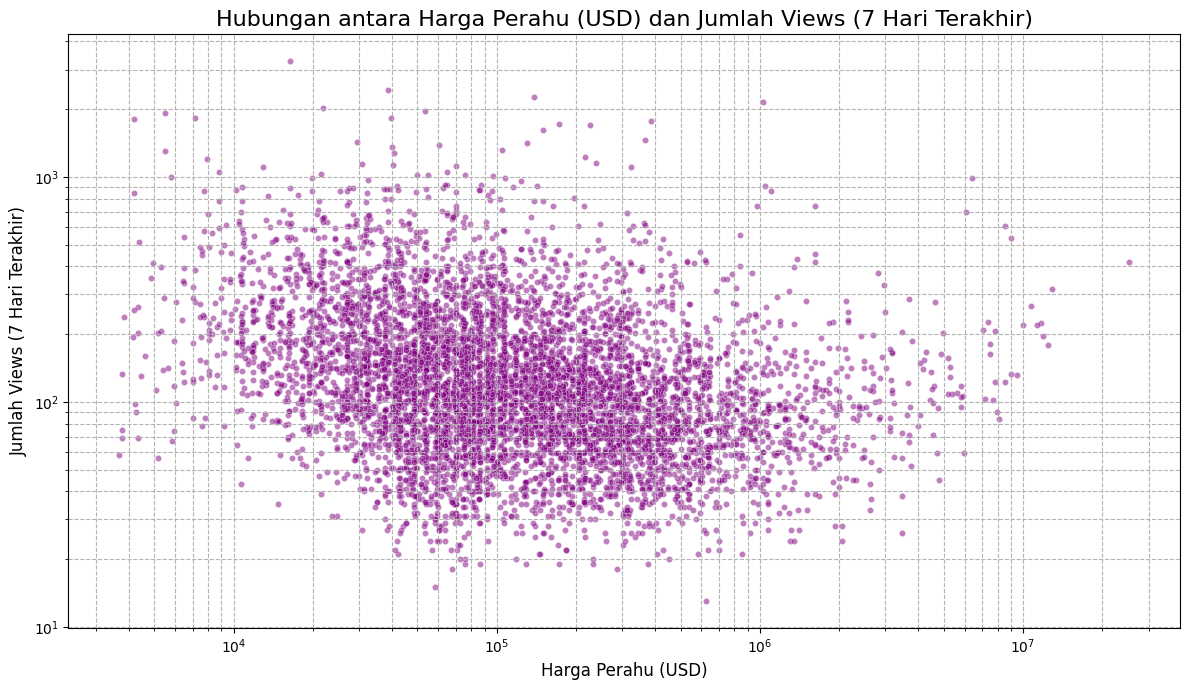


Analisis korelasi Harga (USD) dan Views telah selesai.


In [118]:
# Memilih 2 kolom spesifik ('Price_USD' & 'Number of views last 7 days') dr df_cleaned yg sdh brsih.
# Untuk keamanan, buat salinan agar tdk memengaruhi df_cleaned scr tdk sengaja
df_for_corr = df_cleaned[['Price_USD', 'Number of views last 7 days']].copy()

# Jk ada nilai di kolom yg tdk bs diubah mnjd angka, errors='coerce' akan mngubah nilai2 tsb jd `NaN` (Not a Number/nilai yg hilang).
df_for_corr['Price_USD'] = pd.to_numeric(df_for_corr['Price_USD'], errors='coerce') # Mengonversi Series (kolom) jd tipe data numerik (angka).
df_for_corr['Number of views last 7 days'] = pd.to_numeric(df_for_corr['Number of views last 7 days'], errors='coerce')

# Hapus baris dengan NaN di kolom-kolom yang relevan untuk korelasi
df_for_corr.dropna(subset=['Price_USD', 'Number of views last 7 days'], inplace=True)

print("\n--- Status Data untuk Korelasi ---")
print(f"Jumlah baris setelah dropna: {len(df_for_corr)}")
print(f"Tipe data 'Price_USD': {df_for_corr['Price_USD'].dtype}")
print(f"Tipe data 'Number of views last 7 days': {df_for_corr['Number of views last 7 days'].dtype}")
print("-" * 40)

# --- Hitung Koefisien Korelasi Pearson ---
correlation = df_for_corr['Price_USD'].corr(df_for_corr['Number of views last 7 days'])
print("\n--- Hasil Koefisien Korelasi Pearson ---")
print(f"Koefisien Korelasi (Price_USD vs Views): {correlation:.4f}") #4f mmformat correlation mnjd 4angka di blkng koma, presisi yg baik utk koefisien korelasi.

if correlation > 0.5:
    print("Interpretasi: Ada korelasi positif yang kuat. Perahu yang lebih mahal cenderung mendapat lebih banyak views.")
elif correlation > 0.2:
    print("Interpretasi: Ada korelasi positif yang moderat.")
elif correlation > -0.2:
    print("Interpretasi: Korelasi sangat lemah atau tidak ada hubungan linier yang jelas.")
else: # correlation <= -0.2
    print("Interpretasi: Ada korelasi negatif. Perahu yang lebih mahal cenderung mendapat lebih sedikit views.")
print("-" * 40)

# --- Visualisasi Scatterplot ---
plt.figure(figsize=(12, 7))
# data=df_for_corr: Mnntukan DF yg akan digunakn utk mmbuat plot. Ini adalah DataFrame yang sudah Anda siapkan sebelumnya
# alpha=0.5: Mengatur tingkat transparansi (kejelasan) titik-titik. Nilai 0.5 berarti titik-titik akan sedikit transparan (setengah terlihat).
# s=20: Mengatur ukuran setiap titik (marker) di scatter plot menjadi 20.
sns.scatterplot(x='Price_USD', y='Number of views last 7 days', data=df_for_corr, alpha=0.5, s=20, color='purple')
plt.title('Hubungan antara Harga Perahu (USD) dan Jumlah Views (7 Hari Terakhir)', fontsize=16)
plt.xlabel('Harga Perahu (USD)', fontsize=12)
plt.ylabel('Jumlah Views (7 Hari Terakhir)', fontsize=12)

# Menggunakan skala logaritmik untuk kedua sumbu jika min > 0, karena data harga dan views bisa sangat bervariasi
if df_for_corr['Price_USD'].min() > 0:
    plt.xscale('log') #Skala logaritmik tdk bs diterapkn pd angka 0/negatif karna tidak terdefinisi.
    #Jk kondisi di atas benar (nilai min 'Price_USD' >0), maka sumbu X (yg menampilkan 'Price_USD') akan diubah ke skala logaritmik.
    # Ini berarti jarak antar *tick* pada sumbu X tidak lagi linier (misal 10, 20, 30), melainkan akan eksponensial (misal 1, 10, 100, 1000).

if df_for_corr['Number of views last 7 days'].min() > 0:
    plt.yscale('log')

# True: Mengaktifkan tampilan grid (garis2 bantu).
# which="both": Menampilkan grid untuk tick mayor (garis utama) dan tick minor (garis kecil di antaranya), jika ada.
# ls="--": Mengatur gaya garis grid menjadi garis putus-putus (--).
# c='0.7': Menentukan warna garis grid. '0.7' adalah abu-abu terang.
plt.grid(True, which="both", ls="--", c='0.7')
plt.tick_params(axis='x', labelsize=10) # Menyesuaikan parameter untuk 'ticks'dan label pada sumbu X (horizontal).
plt.tick_params(axis='y', labelsize=10)
plt.tight_layout()
plt.show()

print("\nAnalisis korelasi Harga (USD) dan Views telah selesai.")

Menggunakan 2 pendekatan untuk menjawab pertanyaan ini:

Analisis Perbandingan Kelompok (All Boats vs. Top Viewed Boats):
- Statistik Deskriptif Price_USD (All Boats): Median: $127,511.50
- Statistik Deskriptif Price_USD (Top Viewed Boats): Median: $39,000.00
- **Interpretasi** dari **Perbandingan Kelompok**: Dari analisis ini, terlihat jelas bahwa median harga untuk Top Viewed Boats ($39,000.00) jauh lebih rendah dibandingkan dengan median harga untuk All Boats ($127,511.50). Perbedaan lebih dari 3x lipat ini secara langsung mengindikasikan bahwa mayoritas kapal yang paling banyak dilihat memiliki harga yang jauh lebih terjangkau.

Analisis Korelasi Statistik (Koefisien Korelasi Pearson dan Scatterplot):
- **Interpretasi**: Koefisien Korelasi Pearson sebesar -0.0432 menunjukkan adanya korelasi negatif yang sangat lemah antara Price_USD dan Number of views last 7 days. Nilai yang mendekati nol ini berarti bahwa tidak ada hubungan linier yang kuat atau jelas antara harga perahu dan seberapa banyak views yang didapatkannya.
- Scatterplot juga mendukung interpretasi ini. Meskipun sumbu menggunakan skala logaritmik, titik-titik data terlihat tersebar luas tanpa pola linier yang jelas (yaitu, tidak ada tren naik atau turun yang kuat). Data tampak seperti "awan" titik-titik di mana kapal dengan berbagai harga bisa mendapatkan jumlah views yang bervariasi. Namun, kita bisa melihat kepadatan yang lebih tinggi di area harga yang lebih rendah dan views yang lebih rendah hingga menengah.

**Kesimpulan Akhir** untuk Pertanyaan 2:

Berdasarkan kedua pendekatan analisis:
1. Analisis perbandingan kelompok secara eksplisit menunjukkan bahwa kapal yang mendapatkan views terbanyak (10% teratas) cenderung memiliki harga yang jauh lebih terjangkau (median $39,000) dibandingkan dengan semua kapal ($127,511.50).
2. Analisis korelasi Pearson menunjukkan bahwa hubungan linier antara harga perahu dan jumlah views secara keseluruhan sangat lemah (-0.0432).

Meskipun korelasi linier keseluruhan sangat lemah, temuan dari perbandingan kelompok lebih relevan untuk menjawab pertanyaan "Apakah perahu yang paling mahal yang mendapat pemandangan terbanyak?". Data secara konsisten menunjukkan bahwa TIDAK, perahu yang paling mahal bukanlah yang mendapatkan pemandangan terbanyak. Sebaliknya, perahu yang lebih terjangkau memiliki probabilitas yang lebih tinggi untuk masuk ke dalam kategori "paling banyak dilihat". Artinya, harga tinggi bukan pendorong views yang tinggi, dan harga terjangkau justru lebih menarik.

---

**3. Karakteristik apa saja yang paling memengaruhi jumlah tampilan (views)?**

Tujuannya adalah mengidentifikasi semua karakteristik yang memiliki dampak atau pengaruh terhadap Number of views last 7 days.
*Pertanyaan 1 memang secara implisit mencari korelasi atau asosiasi, tetapi pendekatannya lebih ke arah identifikasi dan perbandingan pola daripada pengukuran korelasi linier yang spesifik untuk setiap pasangan variabel.




--- Analisis Pengaruh Kolom Numerik terhadap Jumlah Views ---

### Menganalisis Pengaruh: Year Built ###
Koefisien Korelasi (Year Built vs Views): -0.1883
Interpretasi: Korelasi sangat lemah atau tidak ada hubungan linier yang jelas.
------------------------------


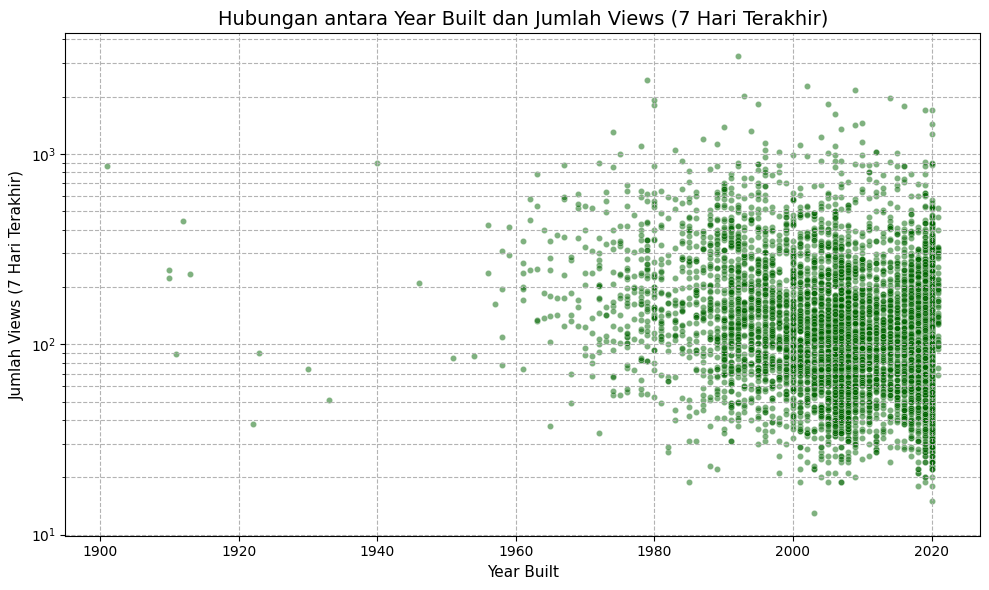


### Menganalisis Pengaruh: Length ###
Koefisien Korelasi (Length vs Views): -0.1648
Interpretasi: Korelasi sangat lemah atau tidak ada hubungan linier yang jelas.
------------------------------


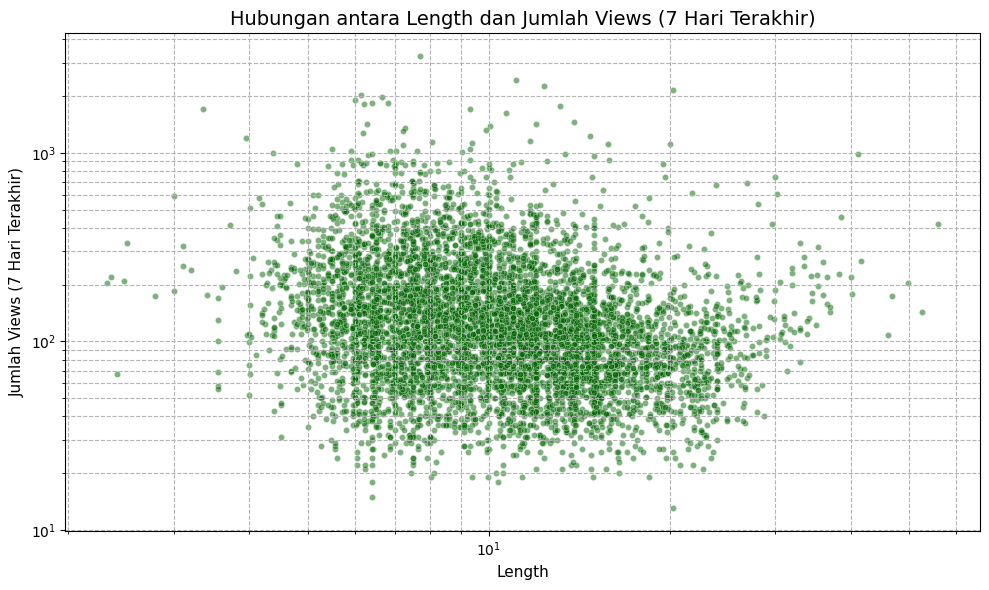


### Menganalisis Pengaruh: Width ###
Koefisien Korelasi (Width vs Views): -0.1814
Interpretasi: Korelasi sangat lemah atau tidak ada hubungan linier yang jelas.
------------------------------


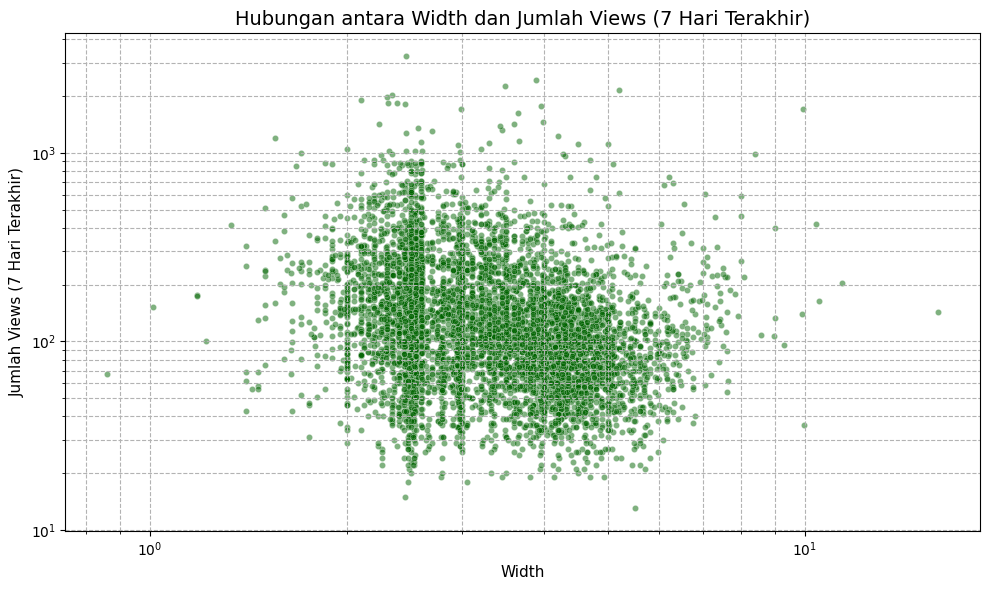


--- Analisis Pengaruh Kolom Numerik Selesai ---


In [119]:
# Pastikan kolom-kolom views sudah numerik dari awal
df_cleaned['Number of views last 7 days'] = pd.to_numeric(df_cleaned['Number of views last 7 days'], errors='coerce')

# Kolom numerik yang akan dianalisis pengaruhnya
numerical_cols_to_analyze = ['Year Built', 'Length', 'Width']

print("\n--- Analisis Pengaruh Kolom Numerik terhadap Jumlah Views ---")

for col in numerical_cols_to_analyze:
    print(f"\n### Menganalisis Pengaruh: {col} ###")

    # Buat salinan DataFrame untuk analisis korelasi spesifik ini
    df_for_corr_num = df_cleaned[[col, 'Number of views last 7 days']].copy()

    # Pastikan kolom numerik dan views adalah tipe numerik
    df_for_corr_num[col] = pd.to_numeric(df_for_corr_num[col], errors='coerce')
    df_for_corr_num['Number of views last 7 days'] = pd.to_numeric(df_for_corr_num['Number of views last 7 days'], errors='coerce')

    # Hapus baris dengan NaN di kedua kolom
    df_for_corr_num.dropna(subset=[col, 'Number of views last 7 days'], inplace=True)

    if not df_for_corr_num.empty:
        # Hitung Koefisien Korelasi Pearson
        correlation = df_for_corr_num[col].corr(df_for_corr_num['Number of views last 7 days'])
        print(f"Koefisien Korelasi ({col} vs Views): {correlation:.4f}")

        if correlation > 0.5:
            print("Interpretasi: Ada korelasi positif yang kuat.")
        elif correlation > 0.2:
            print("Interpretasi: Ada korelasi positif yang moderat.")
        elif correlation > -0.2:
            print("Interpretasi: Korelasi sangat lemah atau tidak ada hubungan linier yang jelas.")
        else: # correlation <= -0.2
            print("Interpretasi: Ada korelasi negatif.")
        print("-" * 30)

        # Visualisasi Scatterplot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=col, y='Number of views last 7 days', data=df_for_corr_num, alpha=0.5, s=20, color='darkgreen')
        plt.title(f'Hubungan antara {col} dan Jumlah Views (7 Hari Terakhir)', fontsize=14)
        plt.xlabel(col, fontsize=11)
        plt.ylabel('Jumlah Views (7 Hari Terakhir)', fontsize=11)

        # Menggunakan skala logaritmik untuk sumbu y (views) karena rentang yang lebar
        if df_for_corr_num['Number of views last 7 days'].min() > 0:
            plt.yscale('log')

        # Untuk sumbu x (kolom numerik), hanya gunakan log scale jika datanya positif dan rentangnya lebar
        if col in ['Price_USD', 'Length', 'Width'] and df_for_corr_num[col].min() > 0:
            plt.xscale('log') # Gunakan log scale untuk Price, Length, Width

        plt.grid(True, which="both", ls="--", c='0.7')
        plt.tick_params(axis='x', labelsize=10)
        plt.tick_params(axis='y', labelsize=10)
        plt.tight_layout()
        plt.show()

    else:
        print(f"Tidak cukup data untuk menganalisis kolom '{col}'.")

print("\n--- Analisis Pengaruh Kolom Numerik Selesai ---")

Karna analisis korelasi Pearson dari Price_USD sudah dilakukan di nomer 2, maka di nomer 3 ini kita hanya menariknya kembali

**Hasil Analisis:**
1. Price_USD: Koefisien Korelasi (Price_USD vs Views): -0.0432
- Interpretasi: Korelasi ini sangat lemah, mendekati nol, dan menunjukkan hampir tidak ada hubungan linier antara harga perahu dan jumlah views. Scatterplot untuk harga juga menunjukkan penyebaran titik yang luas tanpa pola yang jelas.
2. Tahun Pembuatan (Year Built): Koefisien Korelasi (Year Built vs Views): -0.1883
- Interpretasi: Korelasi ini juga sangat lemah dan negatif. Ini menunjukkan bahwa perahu yang lebih baru (tahun pembuatan lebih tinggi) cenderung mendapatkan sedikit lebih sedikit views, tetapi pengaruhnya sangat minimal. Scatterplot menunjukkan kepadatan data di tahun-tahun yang lebih baru, namun tidak ada tren linier yang kuat.
3. Length: Koefisien Korelasi (Length vs Views): -0.1648
- Interpretasi: Korelasi ini sangat lemah dan negatif. Artinya, perahu yang lebih panjang cenderung mendapatkan sedikit lebih sedikit views, tetapi pengaruhnya sangat kecil. Scatterplot menunjukkan titik-titik tersebar tanpa tren linier yang jelas.
4. Lebar (Width): Koefisien Korelasi (Width vs Views): -0.1814
- Interpretasi: Korelasi ini juga sangat lemah dan negatif. Perahu yang lebih lebar cenderung mendapatkan sedikit lebih sedikit views, tetapi pengaruhnya sangat kecil. Scatterplot menunjukkan sebaran yang serupa dengan panjang.


**Kesimpulan:** Berdasarkan analisis koefisien korelasi Pearson untuk karakteristik numerik, tidak ada satu pun karakteristik numerik (Price_USD, Year Built, Length, Width) yang menunjukkan pengaruh linier yang kuat atau signifikan terhadap jumlah views (Number of views last 7 days). Semua koefisien korelasi berada sangat dekat dengan nol (antara -0.04 hingga -0.19), yang mengindikasikan korelasi yang sangat lemah atau hampir tidak ada hubungan linier yang jelas antara variabel-variabel ini dan jumlah views.

Ini berarti bahwa, dari sudut pandang hubungan linier, tidak ada satu pun dari karakteristik numerik ini yang secara dominan "memengaruhi" jumlah views secara langsung. Popularitas views kemungkinan besar dipengaruhi oleh kombinasi faktor-faktor lain.

---

Karakteristik kategorikal tidak bisa diukur dengan koefisien korelasi Pearson yang hanya berlaku untuk data numerik dan hubungan linier. Kita bisa melihat rata-rata jumlah views untuk setiap kategori dari kolom tersebut.


--- Analisis Pengaruh Kolom Kategorikal terhadap Jumlah Views ---

### Menganalisis Pengaruh: Boat Type ###
Rata-rata Views per Kategori untuk 'Boat Type':
Boat Type
Bowrider,Motor Yacht,Sport Boat             2261.0
Hardtop,Motor Yacht                         1466.5
Sport Boat,Wakeboard/Wakesurf,Water ski     1095.0
Cabin Boat,Fishing Boat,Sport Boat          1049.0
Bowrider,Deck Boat,Water ski                 888.0
Bowrider,Wakeboard/Wakesurf                  879.0
Cabin Boat,Sport Boat,Wakeboard/Wakesurf     867.0
Cabin Boat,Trawler                           770.0
Cabin Boat,Classic,Motor Yacht               720.0
Cabin Boat,House Boat,Trawler                651.0
--------------------------------------------------


<ipython-input-120-110631158865>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_for_plot.index, y=top_n_for_plot.values, palette='viridis')


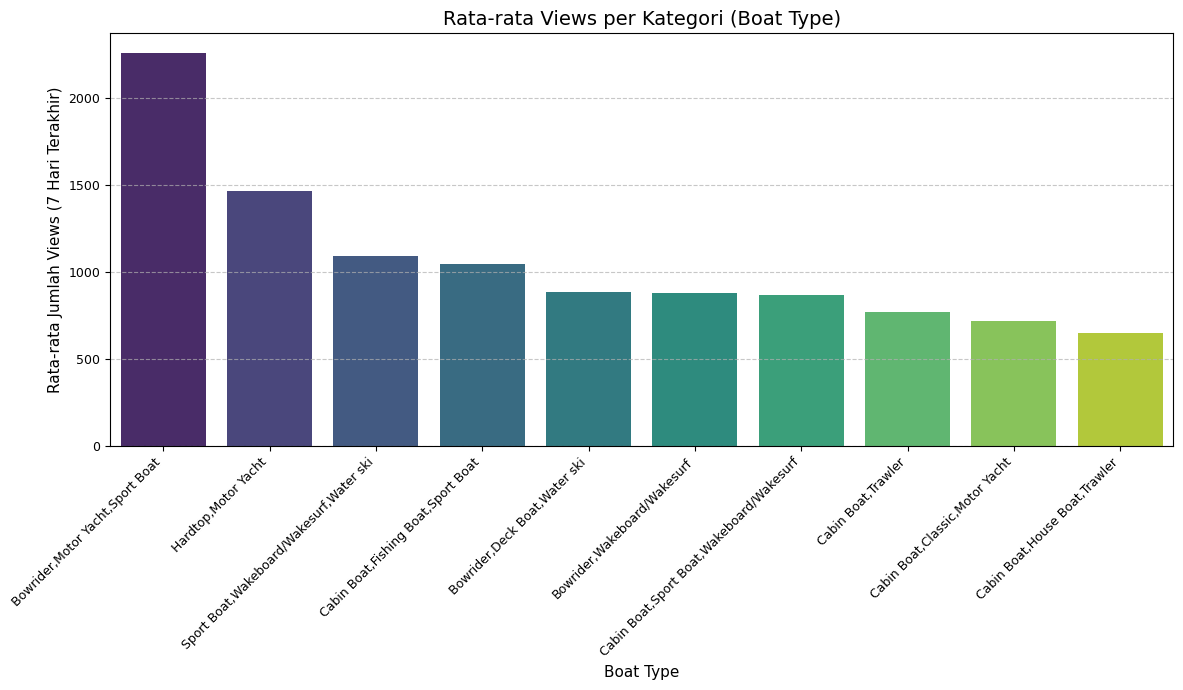


### Menganalisis Pengaruh: Manufacturer ###
Rata-rata Views per Kategori untuk 'Manufacturer':
Manufacturer
Baha power boats                            1831.0
Rodriguez Group (Italyachts) power boats     986.0
Werner  power boats                          900.0
The Captains power boats                     888.0
Bluewater Yachts power boats                 888.0
ATOMIX power boats                           885.0
van de Werf power boats                      868.0
Hensa  power boats                           849.0
Pegiva power boats                           790.0
Stama power boats                            782.0
--------------------------------------------------


<ipython-input-120-110631158865>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_for_plot.index, y=top_n_for_plot.values, palette='viridis')


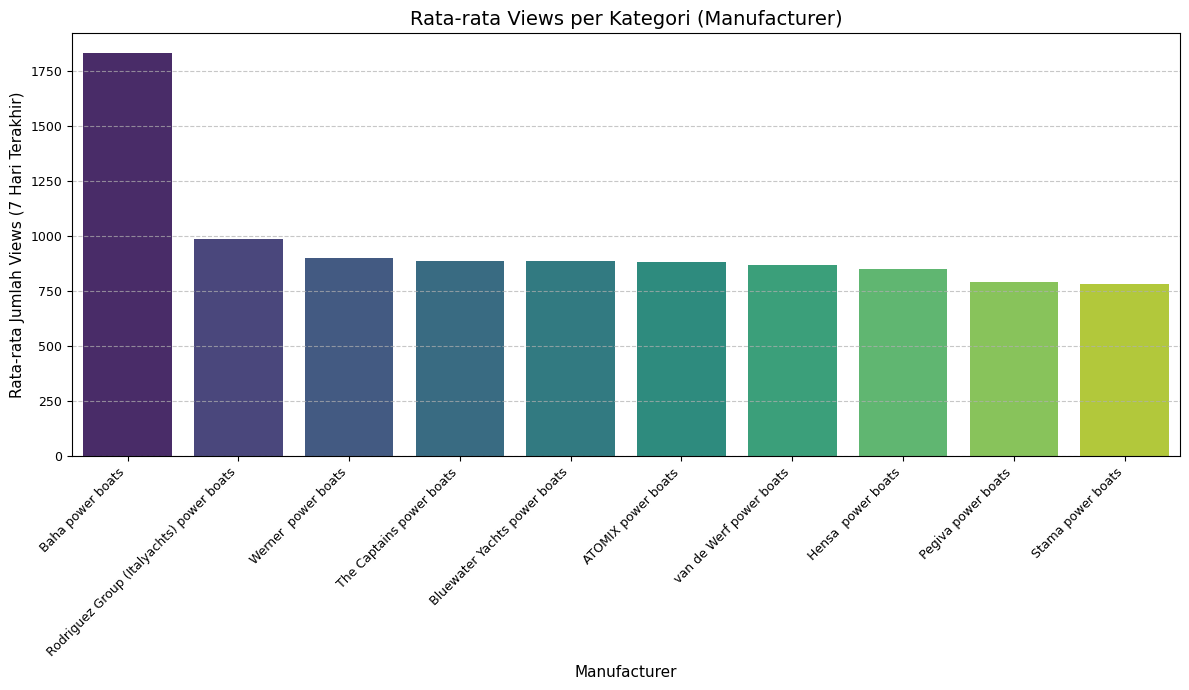


### Menganalisis Pengaruh: Type ###
Rata-rata Views per Kategori untuk 'Type':
Type
New Boat From Stock,Hybrid    384.000000
Used Boat,Unleaded            253.822995
Display Model                 240.090909
Display Model,Diesel          238.125000
Used Boat,Propane             224.000000
Used Boat,Electric            203.866667
Display Model,Unleaded        193.437500
Unleaded                      189.714286
New Boat On Order,Diesel      186.229167
Display Model,Electric        185.000000
--------------------------------------------------


<ipython-input-120-110631158865>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_for_plot.index, y=top_n_for_plot.values, palette='viridis')


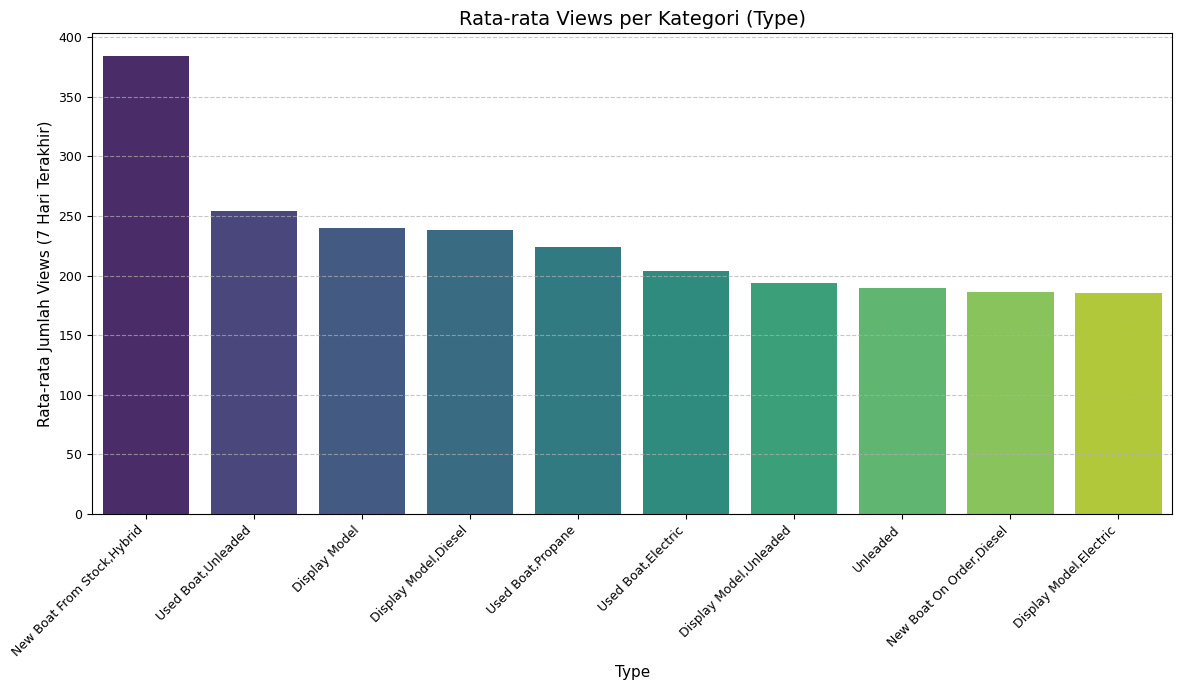


### Menganalisis Pengaruh: Material ###
Rata-rata Views per Kategori untuk 'Material':
Material
Plastic          529.666667
Carbon Fiber     265.481481
Thermoplastic    257.538462
Wood             251.326531
Aluminium        175.100775
GRP              169.974495
Steel            150.870416
Hypalon          111.250000
PVC               84.941286
Rubber            63.000000
--------------------------------------------------


<ipython-input-120-110631158865>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_for_plot.index, y=top_n_for_plot.values, palette='viridis')


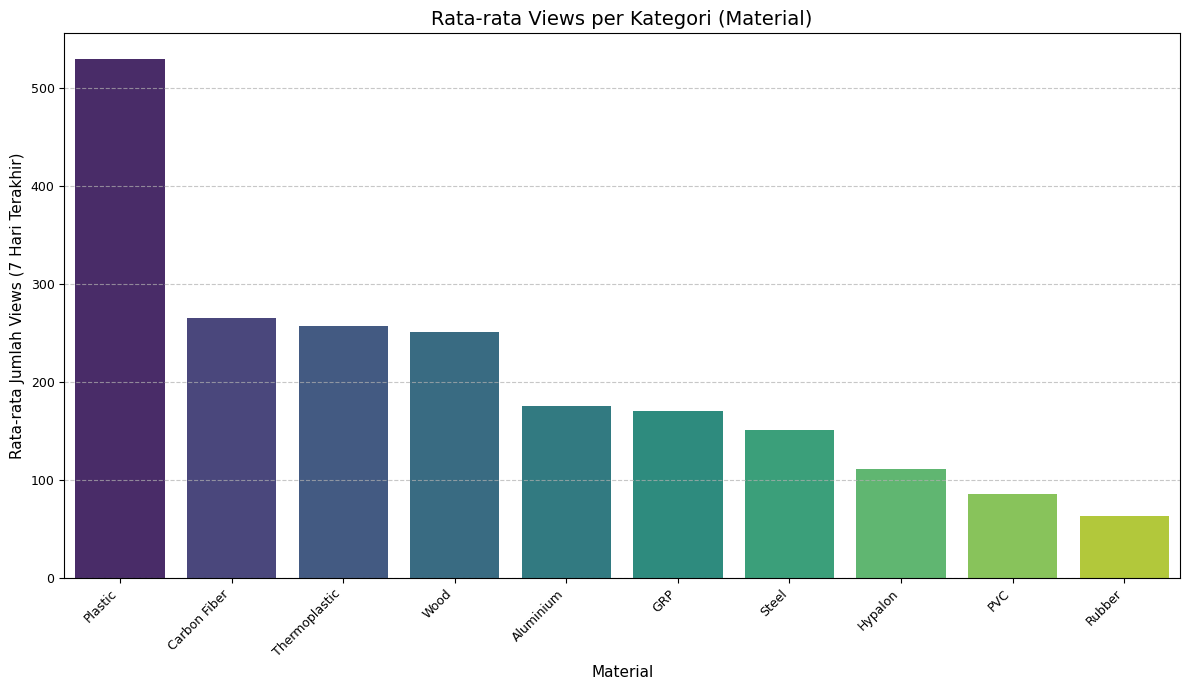


### Menganalisis Pengaruh: Country_clean ###
Rata-rata Views per Kategori untuk 'Country_clean':
Country_clean
Thailand              592.000000
Bulgaria              530.500000
Serbia                442.000000
Switzerland           356.342134
Russian Federation    350.000000
Czechia               348.333333
Romania               225.000000
Poland                215.434783
Belgium               208.581395
Sweden                203.384615
--------------------------------------------------


<ipython-input-120-110631158865>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_for_plot.index, y=top_n_for_plot.values, palette='viridis')


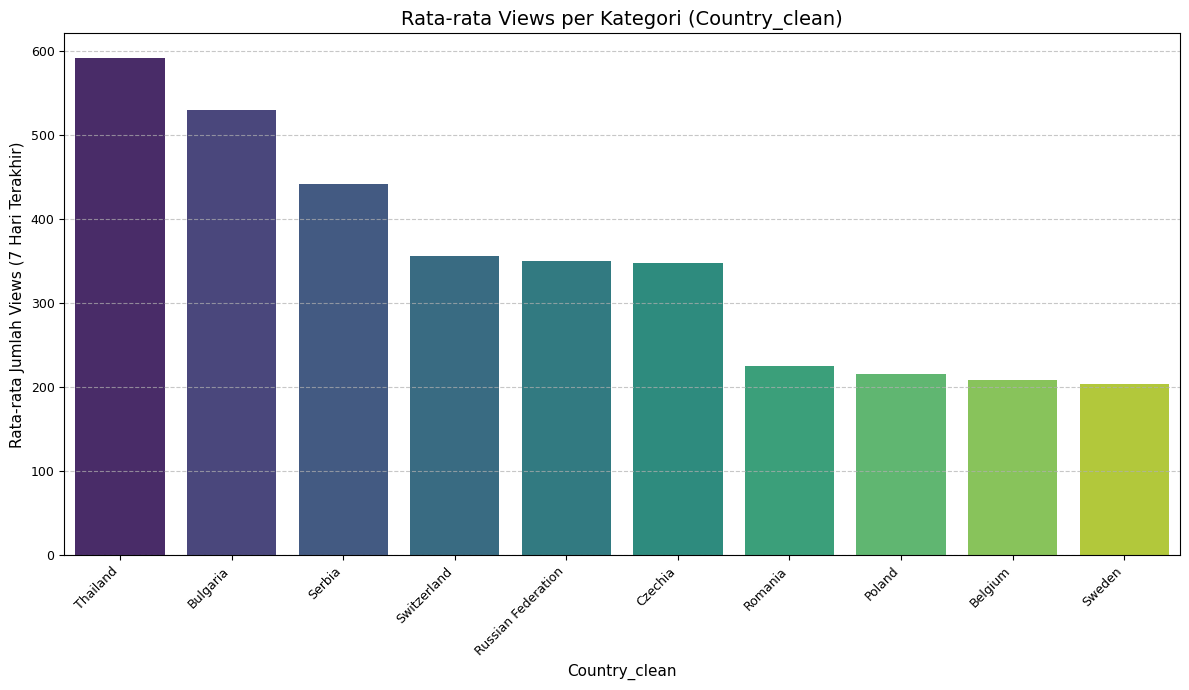


--- Analisis Pengaruh Kolom Kategorikal Selesai ---


In [120]:
# Pastikan kolom views sudah numerik
df_cleaned['Number of views last 7 days'] = pd.to_numeric(df_cleaned['Number of views last 7 days'], errors='coerce')

# Kolom kategorikal yang akan dianalisis pengaruhnya
categorical_cols_to_analyze = ['Boat Type', 'Manufacturer', 'Type', 'Material', 'Country_clean']

print("\n--- Analisis Pengaruh Kolom Kategorikal terhadap Jumlah Views ---")

for col in categorical_cols_to_analyze: # Mngmbl stiap elemen 1/1 dr list brnm categorical_cols_to_analyze. Elemen akn disimpan dlm var smntra brnm col.
    print(f"\n### Menganalisis Pengaruh: {col} ###")   #{col}: Di stiap iterasi loop, placeholder ini akn dignti dgn nilai col saat itu ('Boat Type', dll).

    # Hitung rata-rata views per kategori
    # Pastikan tidak ada NaN di kolom kategorikal yang dipertimbangkan
    avg_views_per_category = df_cleaned.dropna(subset=[col, 'Number of views last 7 days']).groupby(col)['Number of views last 7 days'].mean().sort_values(ascending=False)

    print(f"Rata-rata Views per Kategori untuk '{col}':")
    print(avg_views_per_category.head(10).to_string()) # Tampilkan 10 kategori teratas berdasarkan rata-rata views
    print("-" * 50)

    # Visualisasi Rata-rata Views per Kategori (Top N)
    if not avg_views_per_category.empty:
        plt.figure(figsize=(12, 7))
        # Ambil top 10 kategori untuk visualisasi agar tidak terlalu ramai
        top_n_for_plot = avg_views_per_category.head(10)

        sns.barplot(x=top_n_for_plot.index, y=top_n_for_plot.values, palette='viridis')
        plt.title(f'Rata-rata Views per Kategori ({col})', fontsize=14)
        plt.xlabel(col, fontsize=11)
        plt.ylabel('Rata-rata Jumlah Views (7 Hari Terakhir)', fontsize=11)
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(fontsize=9)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Tidak ada data yang cukup untuk menganalisis kolom '{col}'.")

print("\n--- Analisis Pengaruh Kolom Kategorikal Selesai ---")

- `subset=[col, 'Number of views last 7 days']`: memastikan bahwa baris hanya akan dihapus jk ada nilai NaN di slh satu dr 2 kolom ini (kolom kategori yg sdng dianalisis, dan kolom 'Number of views last 7 days'). Ini mncegah baris dngn data relevan di kolom lain ikut trhapus. Tujuan: Mmastikan hanya data yg lngkap di ke2 kolom ini yg digunakn utk prhitungn rata2, agar hasilnya akurat.
- groupby(col): Stlh baris2 dngn NaN dihapus, DF akan dikelmpokkan brdsrkn nilai2 unik di kolom yg sdng dianalisis. Ini akan mmbuat grup2 data, dmn setiap grup berisi semua baris yg mmiliki nilai kategori yg sm. Tujuan: Mngatur data shngga prhitungn brktnya (rata2) dpt dilakukn perklmpok kategori.
- ['Number of views last 7 days']: Stlh diklmpokkn, kita mmilih kolom ini dr stiap grup. Ini brrti kita hanya akn mlakukn agregasi (perhitungan rata2) pd kolom ini.
- mean(): Mnghitung rata2 dr 'Number of views last 7 days' utk stiap grup kategori yg tlh dibuat. Hslnya adlh sbuah Series dmn indeksnya adlh nm kategori, & nilainya adlh rata2 *views* utk kategori tsb.
- sort_values(ascending=False): Mngurutkan hsl Series dr prhitungn rata2 dr trbsr ke trkcil. Tujuan: Mnmpilkn kategori dngn rata2 *views* trtinggi di pling atas, mmprmudah identifikasi kategori pling populer.


**Hasil:**
1. Boat Type:
- Paling Berpengaruh Positif: Bowrider,Motor Yacht,Sport Boat memiliki rata-rata views tertinggi (sekitar 2261), diikuti oleh Hardtop,Motor Yacht (sekitar 1466). Hal ini menunjukkan bahwa kombinasi tipe perahu ini sangat menarik perhatian. Sport Boat,Wakeboard/Wakesurf,Water ski juga menunjukkan rata-rata views yang tinggi (sekitar 1095).
2. Manufacturer:
- Paling Berpengaruh Positif: Baha power boats menonjol dengan rata-rata views tertinggi (sekitar 1831), jauh di atas produsen lainnya. Ini menunjukkan preferensi yang sangat kuat terhadap produsen ini. Rodriguez Group (Italyachts) power boats berada di urutan kedua (sekitar 986).
3. Type:
- Paling Berpengaruh Positif: New Boat From Stock,Hybrid memiliki rata-rata views tertinggi (sekitar 384). Meskipun demikian, Used Boat,Unleaded (sekitar 253) juga memiliki rata-rata views yang relatif tinggi dan merupakan kategori dominan di 10% teratas kapal populer (seperti yang kita temukan di Pertanyaan 1), menunjukkan bahwa meskipun bukan yang tertinggi dalam rata-rata views absolut, popularitasnya secara volume tetap signifikan.
4. Material:
- Paling Berpengaruh Positif: Plastic menunjukkan rata-rata views tertinggi (sekitar 529), diikuti oleh Carbon Fiber (sekitar 265) dan Thermoplastic (sekitar 257). Material yang lebih ringan dan modern tampaknya menarik lebih banyak perhatian.
5. Country_clean:
- Paling Berpengaruh Positif: Thailand memiliki rata-rata views tertinggi (sekitar 592), diikuti oleh Bulgaria (sekitar 530) dan Serbia (sekitar 442). Ini adalah temuan menarik karena di analisis ciri umum Switzerland yang menonjol. Perbedaan ini menunjukkan bahwa meskipun Switzerland memiliki proporsi kapal populer yang tinggi (jumlah), negara-negara seperti Thailand memiliki rata-rata views per kapal yang lebih tinggi (intensitas).

**Kesimpulan Akhir:** Karakteristik Kategorikal menunjukkan pengaruh yang jauh lebih jelas terhadap jumlah views melalui kategori-kategori spesifik yang memiliki rata-rata views jauh lebih tinggi. Karakteristik yang paling memengaruhi jumlah views adalah:
1. Boat Type: Kombinasi (Bowrider,Motor Yacht,Sport Boat) dan (Hardtop,Motor Yacht).
2. Manufacturer: Baha power boats dan Rodriguez Group (Italyachts) power boats.
3. Material: Plastic, Carbon Fiber, dan Thermoplastic.
4. Country_clean: Thailand, Bulgaria, dan Serbia memiliki rata-rata views per kapal yang sangat tinggi.
5. Type: New Boat From Stock,Hybrid juga memiliki rata-rata views tertinggi, meskipun Used Boat,Unleaded secara volume lebih dominan.

Ini menunjukkan bahwa pasar lebih reaktif terhadap jenis spesifik kapal, merek tertentu, material tertentu, dan asal negara tertentu daripada sekadar harga, usia, atau dimensi fisik kapal.

---

**4. Bisakah kita membuat model prediktif sederhana untuk memperkirakan jumlah tampilan (views) berdasarkan karakteristik kapal?"**

Tujuan model semacam ini adalah untuk belajar dari data historis dan kemudian menggunakan karakteristik kapal baru untuk memprediksi berapa banyak views yang kemungkinan akan didapatkannya.

**Intinya** adalah, kita ingin mesin (komputer) "belajar" dari contoh-contoh kapal yang sudah ada (yaitu df_cleaned) bagaimana karakteristik-karakteristik (harga, tipe, tahun, dll.) berhubungan dengan jumlah views. Setelah belajar, mesin ini diharapkan bisa "memprediksi" jumlah views untuk kapal baru yang belum pernah dilihatnya, hanya berdasarkan karakteristiknya.

Ini adalah langkah machine learning yang dikenal sebagai Regresi, karena kita memprediksi nilai numerik kontinu (Number of views last 7 days).


Ukuran training set (X_train): (5259, 9)
Ukuran test set (X_test): (1315, 9)
--------------------------------------------------
Melatih model...
Model selesai dilatih.
--------------------------------------------------
Mengevaluasi model pada test set...
Mean Absolute Error (MAE): 80.29
R-squared (R2): 0.2767
--------------------------------------------------

--- Contoh Prediksi Sederhana ---
Perbandingan Aktual vs Prediksi (5 sampel):
   Actual Views  Predicted Views
0           179            133.0
1            50             98.0
2            55            152.0
3            45            108.0
4            94             63.0
--------------------------------------------------

Model prediktif sederhana telah dibangun dan dievaluasi.
Perhatikan nilai MAE dan R-squared untuk memahami kinerja model.
MAE adalah rata-rata selisih mutlak antara prediksi dan nilai sebenarnya.
R-squared menunjukkan seberapa baik model menjelaskan variabilitas views (mendekati 1 lebih baik).

--- Visualisa

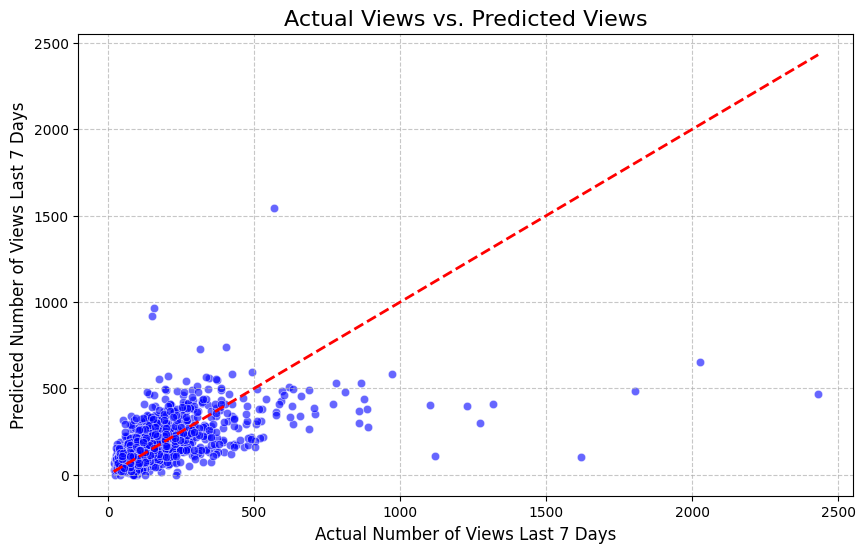

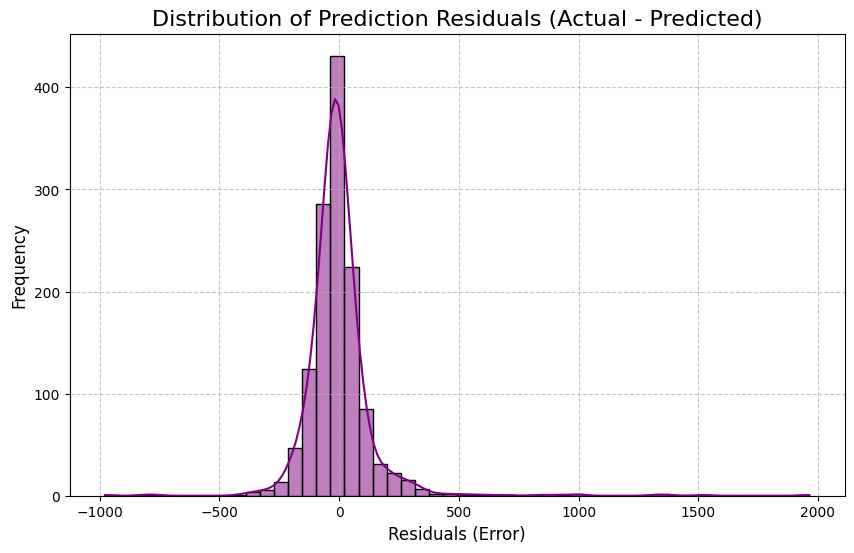

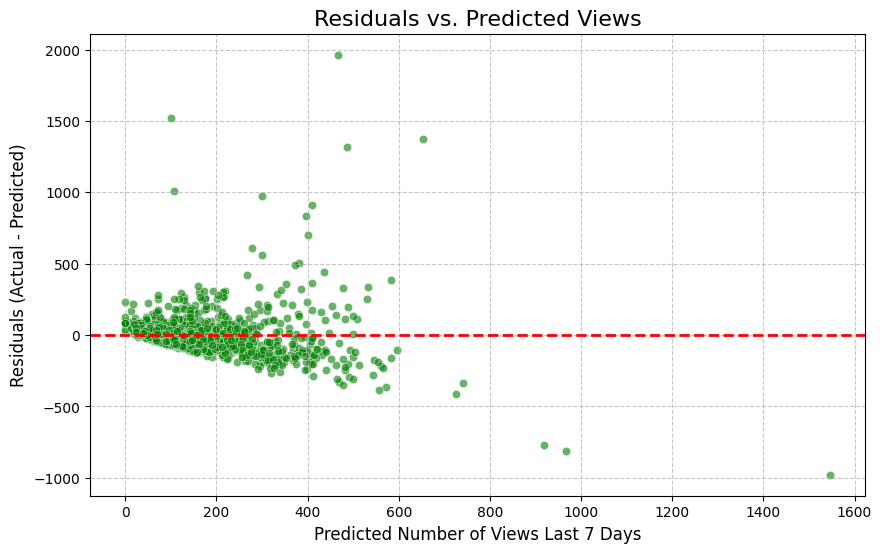


Visualisasi kinerja model selesai.
Perhatikan plot: Aktual vs Prediksi untuk melihat sebaran titik di sekitar garis ideal.
Perhatikan plot Residuals untuk melihat apakah ada pola dalam kesalahan prediksi.


In [121]:
# Fungsi ini digunakan utk mmbagi dataset jd 2 bagian:
# Training set: Digunakan untuk melatih model.
# Testing set: Digunakan untuk menguji seberapa baik kinerja model pada data baru yang belum pernah dilihatnya.
from sklearn.model_selection import train_test_split

# Algoritma ML utk mmbuat model regresi linier, brtujuan utk mnemukn hub linier trbaik antara fitur input & variabel target (misalnya, harga views).
from sklearn.linear_model import LinearRegression

# OneHotEncoder: mngubah kolom kategorikal mnjd format numerik yg bs diphmi oleh model. Mnciptakn kolom biner baru utk stiap kategori unik.
# StandardScaler: Utk mnskalakn fitur numerik. Mngubah data shngga mmiliki rata2 0 & standr dev 1.
# Scaling pntng agr fitur dgn rntng nilai yg bsr tdk mndominasi model.
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Digunakan utk *preprocessing* (pra-pemrosesan) data

# Utk mnrapkan trnsformasi preprocessing yg brbeda (spt OneHotEncoder/StandardScaler) ke kolom2 yg brbeda dlm DF scr brsmaan.
from sklearn.compose import ColumnTransformer

# Pipeline mmungkinkn utk mnggabungkn bbrp lngkah preprocessing & model mnjd 1 alur krja yg kohesif.
from sklearn.pipeline import Pipeline # Sngt mmbntu dlm mngtur kode, mncgah kbocoran data, dan mempermudah proses evaluasi.

# mean_absolute_error (MAE): Mnghitung rata2 selisih absolut antara nilai prediksi & nilai aktual. Metrik utk mlht sbrp bsr rata2 'kesalahan' model.
# r2_score (R-squared): Mnghitung koefisien determinasi. Mnnjukkn sbrp baik model mnjlskn variabilitas dlm var target.
# Nilai yg lbh tinggi (mendekati 1) menunjukkan model yang lebih baik.
from sklearn.metrics import mean_absolute_error, r2_score # Digunakan utk mengevaluasi kinerja model regresi

# --- 1. Persiapan Data untuk Pemodelan ---
# Definisikan fitur (X) dan target (y)
X = df_cleaned.drop(columns=['Number of views last 7 days']) #semua kolom lain di 'df_cleaned' akan menjadi fitur input untuk model.
y = df_cleaned['Number of views last 7 days'] # variabel target (variabel dependen).

# Identifikasi kolom numerik dan kategorikal
numerical_features = ['Price_USD', 'Year Built', 'Length', 'Width']
categorical_features = ['Boat Type', 'Manufacturer', 'Type', 'Material', 'Country_clean']

# Hapus baris di mana target (y) adalah NaN atau 0 (jika 0 views dianggap tidak valid untuk prediksi)
# Atau hanya dropna untuk y dan X yang akan digunakan
# Untuk tujuan prediksi, kita perlu memastikan target tidak NaN
df_model = df_cleaned.dropna(subset=['Number of views last 7 days']).copy()
X = df_model.drop(columns=['Number of views last 7 days'])
y = df_model['Number of views last 7 days']

# Kolom numerik dan kategorikal yang benar-benar ada di X setelah dropna
numerical_features = [col for col in numerical_features if col in X.columns] # hnya mnyrtkn nama2 kol num yg benar2 ada di DataFrame `X`.
categorical_features = [col for col in categorical_features if col in X.columns]

# Buat transformer untuk pra-pemrosesan
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) #handle_unknown='ignore': Jk model mlht ktgori baru saat prediksi (yg tdk ada di data training), akan diabaikan drpd mnghslkn error.
    ],
    remainder='passthrough' # Biarkan kolom lain yang tidak masuk list (jika ada)
)

# --- 2. Pembagian Data ---
# 0.2 berarti 20% dari total data akan digunakan sebagai data uji. Sisanya (80%) akan secara otomatis digunakan sebagai data latih.
# random_state=42: Ini adalah seed untuk generator angka acak. Ketika train_test_split membagi data, ia melakukannya secara acak.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran training set (X_train): {X_train.shape}")
print(f"Ukuran test set (X_test): {X_test.shape}")
print("-" * 50)

# --- 3. Pemilihan dan Pelatihan Model ---
# Buat pipeline yang menggabungkan preprocessor dan model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) # Menggunakan Linear Regression sebagai model sederhana
])

print("Melatih model...")
model_pipeline.fit(X_train, y_train)
print("Model selesai dilatih.")
print("-" * 50)

# --- 4. Evaluasi Model ---
print("Mengevaluasi model pada test set...")
y_pred = model_pipeline.predict(X_test)

# Mengatasi prediksi views negatif (views tidak bisa negatif)
y_pred[y_pred < 0] = 0

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.4f}")
print("-" * 50)

# --- Contoh Prediksi Sederhana ---
print("\n--- Contoh Prediksi Sederhana ---")
# Ambil 5 contoh dari test set untuk melihat prediksi
sample_indices = X_test.head(5).index
sample_X = X_test.loc[sample_indices]
sample_y_actual = y_test.loc[sample_indices]
sample_y_pred = model_pipeline.predict(sample_X)
sample_y_pred[sample_y_pred < 0] = 0 # Pastikan prediksi tidak negatif

predictions_df = pd.DataFrame({
    'Actual Views': sample_y_actual.values,
    'Predicted Views': sample_y_pred.round(0)
})
print("Perbandingan Aktual vs Prediksi (5 sampel):")
print(predictions_df.to_string())
print("-" * 50)

print("\nModel prediktif sederhana telah dibangun dan dievaluasi.")
print("Perhatikan nilai MAE dan R-squared untuk memahami kinerja model.")
print("MAE adalah rata-rata selisih mutlak antara prediksi dan nilai sebenarnya.")
print("R-squared menunjukkan seberapa baik model menjelaskan variabilitas views (mendekati 1 lebih baik).")

print("\n--- Visualisasi Kinerja Model Prediktif ---")

# 1. Scatter Plot: Aktual vs Prediksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue', edgecolor='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Garis y=x
plt.title('Actual Views vs. Predicted Views', fontsize=16)
plt.xlabel('Actual Number of Views Last 7 Days', fontsize=12)
plt.ylabel('Predicted Number of Views Last 7 Days', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title('Distribution of Prediction Residuals (Actual - Predicted)', fontsize=16)
plt.xlabel('Residuals (Error)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color='green', edgecolor='w')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) # Garis nol
plt.title('Residuals vs. Predicted Views', fontsize=16)
plt.xlabel('Predicted Number of Views Last 7 Days', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nVisualisasi kinerja model selesai.")
print("Perhatikan plot: Aktual vs Prediksi untuk melihat sebaran titik di sekitar garis ideal.")
print("Perhatikan plot Residuals untuk melihat apakah ada pola dalam kesalahan prediksi.")

- `df_cleaned.dropna(subset=['Number of views last 7 days'])`: Mngmbil df_cleaned yg sdh brsih & mnghps (drop) stiap baris dmn kolom 'Number of views last 7 days' mmiliki nilai yg hilang (NaN).
- Parameter `subset` mmastikan bhwa hanya mnghps baris jk NaN ada di kolom target, bukan di kolom lain yg mngkin tdk relevan utk prediksi jml views.
- Tujuan: Memastikan bahwa setiap baris data yang akan digunakan untuk pemodelan memiliki nilai target yang valid (tidak NaN).

Model regresi linier sederhana telah dibangun untuk memprediksi Number of views last 7 days berdasarkan karakteristik kapal. Model ini menghasilkan metrik:
1. Mean Absolute Error (MAE): 80.29
- Artinya, rata-rata, prediksi model meleset sekitar 80.29 views dari jumlah aktual.
2. R-squared (R2): 0.2767
- Ini berarti model hanya dapat menjelaskan sekitar 27.67% variabilitas (perubahan) dalam jumlah views. Angka ini relatif rendah, mengindikasikan bahwa model linier sederhana ini tidak terlalu kuat dalam menjelaskan mengapa jumlah views bervariasi. Sisa 72.33% variabilitas tidak dijelaskan oleh model ini.

**Visualisasi**
1. Grafik: **Actual Views vs. Predicted Views** (Grafik ini bertujuan untuk menunjukkan seberapa dekat prediksi model dengan nilai aktual).
- Sumbu X (Horizontal): Actual Number of Views Last 7 Days (Jumlah tampilan nyata yang didapat kapal)
- Sumbu Y (Vertikal): Predicted Number of Views Last 7 Days (Jumlah tampilan yang diprediksi oleh model kita)
- Garis Merah Putus-putus: Ini adalah garis ideal y=x. Artinya, jika model kita sempurna, setiap titik biru akan berada tepat di garis merah ini (nilai prediksi sama persis dengan nilai aktual).
- Titik-titik Biru: Setiap titik mewakili satu kapal di data pengujian. Posisi horizontalnya adalah views yang sebenarnya didapat kapal, dan posisi vertikalnya adalah views yang diprediksi oleh model.

**Interpretasi Hasil:**

Banyak titik biru berkerumun di dekat garis merah, terutama di bagian bawah (untuk views yang lebih rendah). Ini menunjukkan bahwa untuk sebagian besar kapal dengan views yang tidak terlalu tinggi, model cukup baik dalam memprediksi. Namun, saat Actual Views meningkat (bergerak ke kanan pada sumbu X), titik-titik biru mulai menyebar jauh di bawah garis merah. Ini berarti model cenderung meremehkan (underpredict) jumlah views untuk kapal-kapal yang sangat populer atau memiliki banyak views. Ada beberapa titik yang sangat jauh dari garis, menunjukkan kesalahan prediksi yang besar.
2. Grafik: **Distribution of Prediction Residuals (Actual - Predicted)** (Grafik ini menunjukkan distribusi kesalahan prediksi model. Idealnya, kita ingin kesalahan tersebar secara normal di sekitar nol, seperti bentuk lonceng yang simetris, dan puncaknya tepat di nol).
- Sumbu X (Horizontal): Residuals (Error) (Selisih antara nilai aktual dan prediksi, yaitu Actual Views - Predicted Views). "Jika Residual positif, artinya model meremehkan (prediksi < aktual)". "Jika Residual negatif, artinya model melebih-lebihkan (prediksi > aktual)". "Jika Residual nol, artinya prediksi tepat".
- Sumbu Y (Vertikal): Frequency (Berapa banyak kesalahan dengan nilai tertentu yang terjadi)

**Interpretasi Hasil:**

Distribusi ini terlihat miring ke kanan (positif). Ini mengkonfirmasi pengamatan dari grafik sebelumnya bahwa model cenderung memiliki kesalahan positif yang lebih besar (yaitu, model lebih sering meremehkan views nyata, terutama untuk nilai views yang tinggi). Puncaknya memang dekat dengan nol, tetapi ekor kanannya lebih panjang, menunjukkan adanya prediksi yang sangat rendah untuk views yang sebenarnya tinggi.
3. Grafik: **Residuals vs. Predicted Views** (Grafik ini membantu mendeteksi pola dalam kesalahan prediksi model. Jika ada pola misalnya: berbentuk kerucut, lengkungan, atau kelompokan, itu menunjukkan model kita mungkin tidak menangkap semua informasi dalam data dengan baik).
- Sumbu X (Horizontal): Predicted Number of Views Last 7 Days (Nilai yang diprediksi oleh model)
- Sumbu Y (Vertikal): Residuals (Actual - Predicted) (Kesalahan prediksi)
- Garis Merah Putus-putus: Ini adalah garis nol (y=0). Idealnya, titik-titik kesalahan harus tersebar acak di sekitar garis ini.

**Interpretasi Hasil:**

Untuk Predicted Views yang rendah (misalnya, di bawah 200-300), residuals cukup tersebar di sekitar nol, tetapi ada kecenderungan beberapa titik di bawah nol (model sedikit melebih-lebihkan). Namun, seiring dengan meningkatnya Predicted Views, residuals cenderung berada di atas nol (menjadi positif), dan penyebarannya juga melebar ke atas. Ini membentuk pola seperti "kerucut" yang terbuka ke atas. Pola ini dengan jelas menunjukkan heteroskedastisitas, artinya kesalahan model tidak konsisten; model memiliki kesalahan yang lebih besar dan cenderung meremehkan untuk kapal dengan views yang diprediksi lebih tinggi. Ini juga mendukung temuan dari grafik pertama dan R2 yang rendah.

**Kesimpulan:** Secara keseluruhan, model prediktif sederhana yang dibuat ini (menggunakan Regresi Linier) adalah model dasar yang fungsional, tetapi kinerjanya masih terbatas dalam memprediksi jumlah views secara akurat, terutama untuk kapal dengan views yang tinggi. Hal ini konsisten dengan temuan kita di Pertanyaan 4 bahwa karakteristik numerik memiliki pengaruh linier yang sangat lemah.

**Hasil dari model Regresi Linier sederhana menunjukkan bahwa meskipun model ini bisa melakukan prediksi, kinerjanya masih terbatas (MAE 80.29, R2 0.2767). Terutama, visualisasi menunjukkan bahwa model ini kesulitan memprediksi views yang sangat tinggi dan cenderung meremehkannya.**

Jadi, langkah berikutnya adalah mencoba model yang lebih canggih!

---



RandomForestRegressor adalah pilihan yang sangat baik karena:
1. Kinerja umum yang baik: Seringkali memberikan hasil yang akurat.
2. Secara otomatis dapat menangani hubungan non-linier dalam data.
3. Robust terhadap Outlier: Tidak terlalu terpengaruh oleh nilai ekstrem dibandingkan Regresi Linier.
4. Kurang Sensitif terhadap Skala: Tidak terlalu bergantung pada penskalaan fitur numerik (meskipun tetap direkomendasikan).
5. Umumnya tidak memerlukan transformasi logaritma seperti Regresi Linier.

Ukuran training set (X_train): (5259, 9)
Ukuran test set (X_test): (1315, 9)
--------------------------------------------------
Melatih model Random Forest...
Model Random Forest selesai dilatih.
--------------------------------------------------
Mengevaluasi model Random Forest pada test set...
Mean Absolute Error (MAE) Random Forest: 68.63
R-squared (R2) Random Forest: 0.4065
--------------------------------------------------

--- Contoh Prediksi Sederhana (Random Forest) ---
Perbandingan Aktual vs Prediksi (5 sampel) dengan Random Forest:
   Actual Views  Predicted Views (RF)
0           179                 216.0
1            50                  64.0
2            55                 112.0
3            45                  83.0
4            94                  79.0
--------------------------------------------------

--- Visualisasi Kinerja Model Random Forest ---


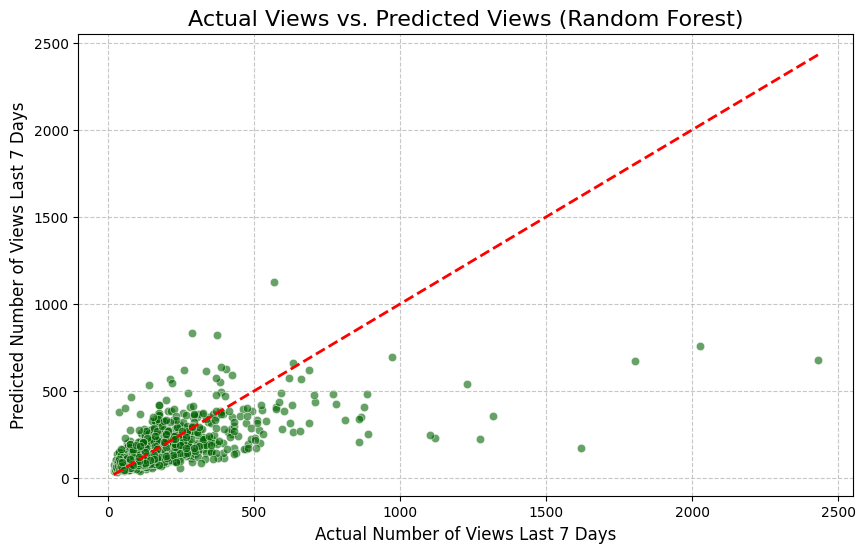

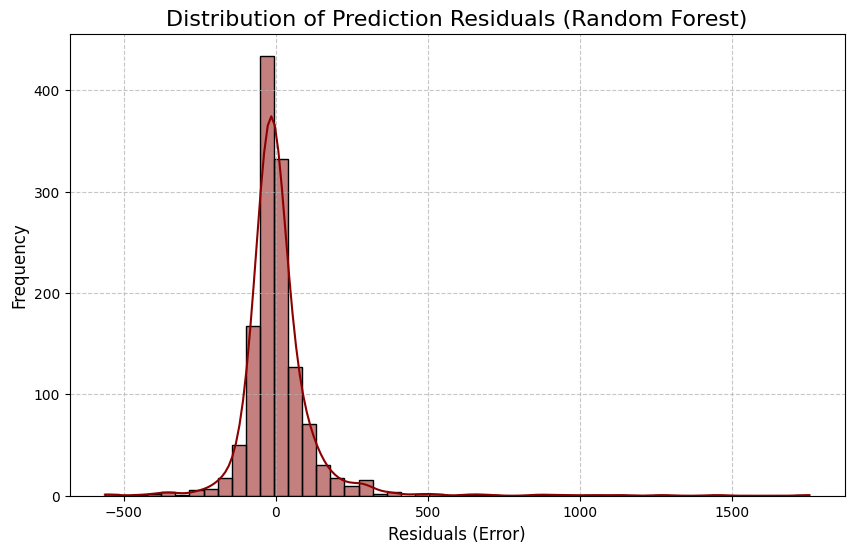

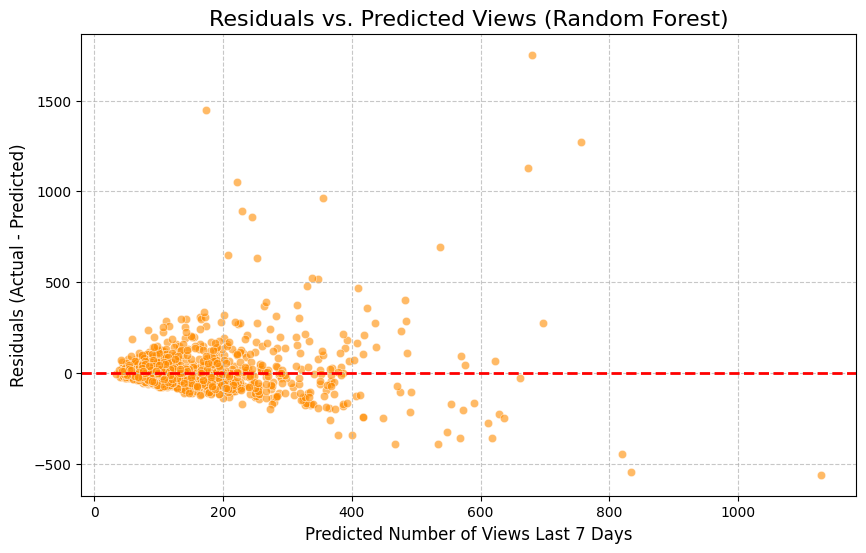


Visualisasi kinerja model Random Forest selesai.


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Import model Random Forest
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# --- 1. Persiapan Data untuk Pemodelan ---
# Hapus baris di mana target (y) adalah NaN
df_model = df_cleaned.dropna(subset=['Number of views last 7 days']).copy()
X = df_model.drop(columns=['Number of views last 7 days'])
y = df_model['Number of views last 7 days'] # Target views (tidak di-transformasi dulu)

# Identifikasi kolom numerik dan kategorikal
numerical_features = ['Price_USD', 'Year Built', 'Length', 'Width']
categorical_features = ['Boat Type', 'Manufacturer', 'Type', 'Material', 'Country_clean']

# Filter fitur agar hanya yang ada di X.columns yang diproses
numerical_features = [col for col in numerical_features if col in X.columns]
categorical_features = [col for col in categorical_features if col in X.columns]

# Buat transformer untuk pra-pemrosesan:
# 1. Scaler untuk kolom numerik
# 2. One-Hot Encoder untuk kolom kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# --- 2. Pembagian Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Ukuran training set (X_train): {X_train.shape}")
print(f"Ukuran test set (X_test): {X_test.shape}")
print("-" * 50)

# --- 3. Pemilihan dan Pelatihan Model ---
# Buat pipeline yang menggabungkan preprocessor dan model
# Menggunakan RandomForestRegressor sebagai model yang lebih canggih
# n_estimators: jumlah pohon keputusan yang akan dibangun
# random_state: untuk hasil yang konsisten setiap kali dijalankan
model_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)) # n_jobs=-1 untuk menggunakan semua core CPU
])
print("Melatih model Random Forest...")
model_pipeline_rf.fit(X_train, y_train)
print("Model Random Forest selesai dilatih.")
print("-" * 50)

# --- 4. Evaluasi Model ---
print("Mengevaluasi model Random Forest pada test set...")
y_pred_rf = model_pipeline_rf.predict(X_test)
# Mengatasi prediksi views negatif (walaupun jarang terjadi pada Random Forest)
y_pred_rf[y_pred_rf < 0] = 0

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE) Random Forest: {mae_rf:.2f}")
print(f"R-squared (R2) Random Forest: {r2_rf:.4f}")
print("-" * 50)

# --- Contoh Prediksi Sederhana ---
print("\n--- Contoh Prediksi Sederhana (Random Forest) ---")
sample_indices = X_test.head(5).index
sample_X = X_test.loc[sample_indices]
sample_y_actual = y_test.loc[sample_indices]
sample_y_pred_rf = model_pipeline_rf.predict(sample_X)
sample_y_pred_rf[sample_y_pred_rf < 0] = 0

predictions_df_rf = pd.DataFrame({
    'Actual Views': sample_y_actual.values,
    'Predicted Views (RF)': sample_y_pred_rf.round(0)
})
print("Perbandingan Aktual vs Prediksi (5 sampel) dengan Random Forest:")
print(predictions_df_rf.to_string())
print("-" * 50)

# --- Visualisasi Kinerja Model Random Forest ---
print("\n--- Visualisasi Kinerja Model Random Forest ---")
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter Plot: Aktual vs Prediksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='darkgreen', edgecolor='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Garis y=x
plt.title('Actual Views vs. Predicted Views (Random Forest)', fontsize=16)
plt.xlabel('Actual Number of Views Last 7 Days', fontsize=12)
plt.ylabel('Predicted Number of Views Last 7 Days', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2. Plot Residuals (Histogram)
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, bins=50, kde=True, color='darkred')
plt.title('Distribution of Prediction Residuals (Random Forest)', fontsize=16)
plt.xlabel('Residuals (Error)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 3. Plot Residuals vs. Predicted Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.6, color='darkorange', edgecolor='w')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2) # Garis nol
plt.title('Residuals vs. Predicted Views (Random Forest)', fontsize=16)
plt.xlabel('Predicted Number of Views Last 7 Days', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nVisualisasi kinerja model Random Forest selesai.")

**Interpretasi Metrik:**
1. MAE (Mean Absolute Error):
- MAE Random Forest (68.63) lebih rendah dari MAE Regresi Linier (80.29).
- Ini berarti, secara rata-rata, prediksi model Random Forest lebih dekat ke nilai aktual (views) dibandingkan Regresi Linier. Model Random Forest memiliki rata-rata kesalahan sekitar 68 views.
2. R-squared (R2):
- R2 Random Forest (0.4065) lebih tinggi dari R2 Regresi Linier (0.2767).
- Ini menunjukkan bahwa model Random Forest dapat menjelaskan sekitar 40.65% variabilitas dalam jumlah views, dibandingkan hanya 27.67% oleh Regresi Linier. Artinya, Random Forest lebih baik dalam menjelaskan mengapa jumlah views bervariasi.

**Kesimpulan Awal:** Dari metrik saja, jelas terlihat bahwa model Random Forest memiliki kinerja yang lebih baik daripada Regresi Linier.


**Interpretasi Visualisasi Model Random Forest**
1. Grafik: **Actual Views vs. Predicted Views (Random Forest)**
- Perbandingan dengan Linear Regression:
-> Titik-titik hijau (Random Forest) secara umum lebih rapat dan lebih dekat ke garis merah daripada titik-titik biru (Linear Regression), terutama di bagian views yang lebih rendah hingga menengah.
->Namun, untuk views yang sangat tinggi (di atas 1000-1500), model Random Forest masih cenderung meremehkan (titik-titik masih di bawah garis merah), meskipun mungkin tidak separah Linear Regression. Ini menunjukkan bahwa memprediksi views yang ekstrem tetap merupakan tantangan.
2. Grafik: **Distribution of Prediction Residuals (Random Forest)**
- Perbandingan dengan Linear Regression:
-> Distribusi residual Random Forest ini lebih mendekati bentuk lonceng simetris dan lebih terpusat di sekitar nol dibandingkan dengan Linear Regression yang lebih miring ke kanan.
-> Puncaknya lebih tinggi dan lebih tajam di sekitar nol. Ini menunjukkan bahwa model Random Forest menghasilkan lebih banyak prediksi yang sangat dekat dengan nilai aktual (kesalahan kecil) dibandingkan Regresi Linier.
-> Meskipun masih ada ekor kanan (kesalahan positif besar, artinya meremehkan), ekor tersebut tidak separah dan tidak sepanjang yang terlihat pada Linear Regression.
3. Grafik: **Residuals vs. Predicted Views (Random Forest)**
- Perbandingan dengan Linear Regression:
-> Pola "kerucut" atau "pelebaran ke atas" yang terlihat pada Linear Regression sudah berkurang secara signifikan pada Random Forest.
-> Titik-titik orange (Random Forest) lebih tersebar acak di sekitar garis nol untuk sebagian besar rentang Predicted Views. Ini menunjukkan bahwa Random Forest lebih berhasil dalam membuat kesalahan yang lebih konsisten di seluruh rentang prediksi, meskipun masih ada beberapa outlier residual yang besar, terutama di sisi kanan atas.

**Kesimpulan Akhir** Model Prediktif Sederhana (Random Forest):
Model Random Forest yang dibangun ini jauh lebih baik dalam memprediksi jumlah views dibandingkan model Regresi Linier. Ini terlihat dari:
1. MAE yang lebih rendah (kesalahan rata-rata lebih kecil).
2. R-squared yang lebih tinggi (model lebih baik dalam menjelaskan variabilitas data).
3. Visualisasi yang menunjukkan prediksi lebih dekat ke aktual, distribusi kesalahan lebih terpusat di nol, dan pola kesalahan yang lebih acak.

Meskipun model ini sudah lebih baik, masih ada ruang untuk perbaikan, terutama dalam memprediksi views yang sangat tinggi (yang ekstrem). Ini adalah hal yang umum dalam pemodelan data yang memiliki distribusi ekor panjang.
